In [3]:
import requests
import datetime as dt
from bs4 import BeautifulSoup
import re
import pandas as pd
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
import chromedriver_autoinstaller
import time
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from scipy.stats import norm
from datetime import date
from datetime import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random
plt.rcParams['font.family'] = 'Malgun Gothic'
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# 웹 페이지 URL (한글 및 특수문자 포함된 URL을 인코딩)
from urllib.parse import quote

In [4]:
# 다음 것 외우기: entry for entry in stats if entry['name'] not in names_to_remove

In [85]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [6]:
normal_url = 'https://www.xn--hz2b1j494a9mhnwh.com/normal?bo_table=normal&sop=and&sst=once_price&sod=asc&sfl=&stx=&sca=&page=1#tab-armor'

# 데이터 가져오기

In [7]:
normal_url = 'https://www.xn--hz2b1j494a9mhnwh.com/normal?bo_table=normal&sop=and&sst=once_price&sod=asc&sfl=&stx=&sca=&page=1#tab-armor'

def find_link(driver, link, item_keyword, min_value='1000000000'):
    driver.get(link)

    # Find the input field and enter '앱솔'
    input_field = driver.find_element(By.ID, "armor_name_input")
    input_field.clear()
    input_field.send_keys(item_keyword)

    input_field = driver.find_element(By.ID, "armor_price_min_input")
    input_field.clear()
    input_field.send_keys(min_value)

    input_field = driver.find_element(By.ID, "armor_star_min_input")
    input_field.clear()
    input_field.send_keys('12')

    # Click the search button
#     search_button = driver.find_element(By.CSS_SELECTOR, ".search_btn")
#     time.sleep(0.3)
#     search_button.click()


    search_button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, ".search_btn"))
    )
    search_button.click()

def item_crowling(item_keyword, link):
    pages_data = pd.DataFrame(columns=["name", "link", "price","date"])
    driver_path = r'C:\Users\eheh5\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe'
    service = Service(driver_path)
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=service, options=options)

    # 초기 페이지 설정
    find_link(driver, link, item_keyword)

    previous_count = 0
    min_value = "1000000000"  # 초기 최소값

    while True:
        current_count = len(driver.find_elements(By.CSS_SELECTOR, '#auction-list li'))
        try:
            # "더보기" 버튼 클릭
            button = driver.find_element(By.CSS_SELECTOR, ".moreBtn.f-lg")
#             driver.execute_script("arguments[0].scrollIntoView();", button)
#             time.sleep(0.1)
            button.click()
            previous_count += 1
            print(f"더보기 버튼 클릭 횟수: {previous_count}")

            # 20번 클릭 후 데이터 수집
            if previous_count == 20:
                page_source = driver.page_source
                soup = BeautifulSoup(page_source, 'html.parser')
                items = []
                auction_list = soup.select('#auction-list li')

                for auction in auction_list:
                    item_name = auction.select_one('a.na-subject').text.strip()
                    item_href = auction.select_one('a.na-subject')['href']
                    item_price = auction.select_one('.float-right').text.strip()
                    item_price = auction.select_one('.float-right').text.strip()

                    
                    # auction 내에서 .lefttime 요소를 개별적으로 찾기
                    lefttime_span = auction.select_one('.lefttime')  # auction 안에서 찾음
                    item_date = lefttime_span.text.strip() if lefttime_span else "N/A"

                    items.append([item_name, item_href, item_price,item_date])

                page_data = pd.DataFrame(items, columns=["name", "link", "price","date"])


                # 최소 가격 계산
                page_data['price_numeric'] = page_data['price'].apply(
                    lambda x: int(re.sub(r"[^\d]", "", x)) if re.sub(r"[^\d]", "", x) else None
                )
                numeric_prices = page_data['price_numeric'].dropna()
                pages_data = pd.concat([pages_data, page_data], ignore_index=True)
                max_value = str(numeric_prices.max())
                print(f"최소값으로 업데이트: {max_value}")

                # 새로운 조건으로 검색
                find_link(driver, link, item_keyword, max_value)

                previous_count = 0  # 클릭 횟수 초기화

        except Exception as e:
            print(f"예외 발생: {e}")
            print("No more pages to load.")
            break

        # 아이템 수 변화가 없으면 종료
        new_count = len(driver.find_elements(By.CSS_SELECTOR, '#auction-list li'))
        if new_count == current_count:
            print("No more new items loaded.")
            break

    # 브라우저 종료
    driver.quit()
    return pages_data



In [8]:
items = [
    "거대한 공포", "루즈 컨트롤 머신 마크", "앱솔랩스", "마력이 깃든 안대", "컴플리트 언더 컨트롤", "몽환의 벨트", "고통의 근원",
    "커맨더 포스 이어링", "트와일라이트 마크", "에스텔라 이어링", "가디언 엔젤 링", "데이브레이크 펜던트",
    "트릭스터", "하이네스", "이글아이", "에테르넬", "아케인셰이드"
]

# Execution
for i in range(len(items)):
    globals()[f"dt_{i}"] = item_crowling(items[i], normal_url)
    globals()[f"dt_{i}"] = globals()[f"dt_{i}"].iloc[::-1].reset_index(drop=True)

더보기 버튼 클릭 횟수: 1
더보기 버튼 클릭 횟수: 2
더보기 버튼 클릭 횟수: 3
더보기 버튼 클릭 횟수: 4
더보기 버튼 클릭 횟수: 5
더보기 버튼 클릭 횟수: 6
더보기 버튼 클릭 횟수: 7
더보기 버튼 클릭 횟수: 8
더보기 버튼 클릭 횟수: 9
더보기 버튼 클릭 횟수: 10
더보기 버튼 클릭 횟수: 11
더보기 버튼 클릭 횟수: 12
더보기 버튼 클릭 횟수: 13
더보기 버튼 클릭 횟수: 14
더보기 버튼 클릭 횟수: 15
더보기 버튼 클릭 횟수: 16
더보기 버튼 클릭 횟수: 17
더보기 버튼 클릭 횟수: 18
더보기 버튼 클릭 횟수: 19
더보기 버튼 클릭 횟수: 20
최소값으로 업데이트: 17444444444
더보기 버튼 클릭 횟수: 1
더보기 버튼 클릭 횟수: 2
더보기 버튼 클릭 횟수: 3
더보기 버튼 클릭 횟수: 4
더보기 버튼 클릭 횟수: 5
더보기 버튼 클릭 횟수: 6
더보기 버튼 클릭 횟수: 7
더보기 버튼 클릭 횟수: 8
더보기 버튼 클릭 횟수: 9
더보기 버튼 클릭 횟수: 10
더보기 버튼 클릭 횟수: 11
더보기 버튼 클릭 횟수: 12
더보기 버튼 클릭 횟수: 13
더보기 버튼 클릭 횟수: 14
더보기 버튼 클릭 횟수: 15
더보기 버튼 클릭 횟수: 16
더보기 버튼 클릭 횟수: 17
더보기 버튼 클릭 횟수: 18
더보기 버튼 클릭 횟수: 19
더보기 버튼 클릭 횟수: 20
최소값으로 업데이트: 69500000000
더보기 버튼 클릭 횟수: 1
더보기 버튼 클릭 횟수: 2
더보기 버튼 클릭 횟수: 3
더보기 버튼 클릭 횟수: 4
더보기 버튼 클릭 횟수: 5
더보기 버튼 클릭 횟수: 6
더보기 버튼 클릭 횟수: 7
더보기 버튼 클릭 횟수: 8
더보기 버튼 클릭 횟수: 9
더보기 버튼 클릭 횟수: 10
더보기 버튼 클릭 횟수: 11
No more new items loaded.
더보기 버튼 클릭 횟수: 1
더보기 버튼 클릭 횟수: 2
더보기 버튼 클릭 횟수: 3
더보기 버튼 클릭 횟수: 4
더보기 버튼 클릭 횟수: 5
더보기 버튼

더보기 버튼 클릭 횟수: 11
더보기 버튼 클릭 횟수: 12
더보기 버튼 클릭 횟수: 13
No more new items loaded.
더보기 버튼 클릭 횟수: 1
더보기 버튼 클릭 횟수: 2
더보기 버튼 클릭 횟수: 3
더보기 버튼 클릭 횟수: 4
더보기 버튼 클릭 횟수: 5
더보기 버튼 클릭 횟수: 6
더보기 버튼 클릭 횟수: 7
더보기 버튼 클릭 횟수: 8
더보기 버튼 클릭 횟수: 9
더보기 버튼 클릭 횟수: 10
더보기 버튼 클릭 횟수: 11
더보기 버튼 클릭 횟수: 12
더보기 버튼 클릭 횟수: 13
더보기 버튼 클릭 횟수: 14
더보기 버튼 클릭 횟수: 15
더보기 버튼 클릭 횟수: 16
더보기 버튼 클릭 횟수: 17
더보기 버튼 클릭 횟수: 18
더보기 버튼 클릭 횟수: 19
더보기 버튼 클릭 횟수: 20
최소값으로 업데이트: 50700000000
더보기 버튼 클릭 횟수: 1
더보기 버튼 클릭 횟수: 2
더보기 버튼 클릭 횟수: 3
더보기 버튼 클릭 횟수: 4
더보기 버튼 클릭 횟수: 5
더보기 버튼 클릭 횟수: 6
더보기 버튼 클릭 횟수: 7
더보기 버튼 클릭 횟수: 8
더보기 버튼 클릭 횟수: 9
더보기 버튼 클릭 횟수: 10
더보기 버튼 클릭 횟수: 11
더보기 버튼 클릭 횟수: 12
더보기 버튼 클릭 횟수: 13
더보기 버튼 클릭 횟수: 14
No more new items loaded.
더보기 버튼 클릭 횟수: 1
더보기 버튼 클릭 횟수: 2
더보기 버튼 클릭 횟수: 3
더보기 버튼 클릭 횟수: 4
더보기 버튼 클릭 횟수: 5
더보기 버튼 클릭 횟수: 6
더보기 버튼 클릭 횟수: 7
더보기 버튼 클릭 횟수: 8
더보기 버튼 클릭 횟수: 9
더보기 버튼 클릭 횟수: 10
더보기 버튼 클릭 횟수: 11
더보기 버튼 클릭 횟수: 12
더보기 버튼 클릭 횟수: 13
더보기 버튼 클릭 횟수: 14
더보기 버튼 클릭 횟수: 15
더보기 버튼 클릭 횟수: 16
더보기 버튼 클릭 횟수: 17
더보기 버튼 클릭 횟수: 18
더보기 버튼 클릭 횟수: 19

더보기 버튼 클릭 횟수: 16
더보기 버튼 클릭 횟수: 17
더보기 버튼 클릭 횟수: 18
더보기 버튼 클릭 횟수: 19
더보기 버튼 클릭 횟수: 20
최소값으로 업데이트: 4999999999
더보기 버튼 클릭 횟수: 1
더보기 버튼 클릭 횟수: 2
더보기 버튼 클릭 횟수: 3
더보기 버튼 클릭 횟수: 4
더보기 버튼 클릭 횟수: 5
더보기 버튼 클릭 횟수: 6
더보기 버튼 클릭 횟수: 7
더보기 버튼 클릭 횟수: 8
더보기 버튼 클릭 횟수: 9
더보기 버튼 클릭 횟수: 10
더보기 버튼 클릭 횟수: 11
더보기 버튼 클릭 횟수: 12
더보기 버튼 클릭 횟수: 13
더보기 버튼 클릭 횟수: 14
더보기 버튼 클릭 횟수: 15
더보기 버튼 클릭 횟수: 16
더보기 버튼 클릭 횟수: 17
더보기 버튼 클릭 횟수: 18
더보기 버튼 클릭 횟수: 19
더보기 버튼 클릭 횟수: 20
최소값으로 업데이트: 11999999999
더보기 버튼 클릭 횟수: 1
더보기 버튼 클릭 횟수: 2
더보기 버튼 클릭 횟수: 3
더보기 버튼 클릭 횟수: 4
더보기 버튼 클릭 횟수: 5
더보기 버튼 클릭 횟수: 6
더보기 버튼 클릭 횟수: 7
더보기 버튼 클릭 횟수: 8
더보기 버튼 클릭 횟수: 9
더보기 버튼 클릭 횟수: 10
더보기 버튼 클릭 횟수: 11
더보기 버튼 클릭 횟수: 12
더보기 버튼 클릭 횟수: 13
더보기 버튼 클릭 횟수: 14
더보기 버튼 클릭 횟수: 15
더보기 버튼 클릭 횟수: 16
더보기 버튼 클릭 횟수: 17
더보기 버튼 클릭 횟수: 18
더보기 버튼 클릭 횟수: 19
더보기 버튼 클릭 횟수: 20
최소값으로 업데이트: 32000000000
더보기 버튼 클릭 횟수: 1
더보기 버튼 클릭 횟수: 2
No more new items loaded.
더보기 버튼 클릭 횟수: 1
더보기 버튼 클릭 횟수: 2
더보기 버튼 클릭 횟수: 3
더보기 버튼 클릭 횟수: 4
더보기 버튼 클릭 횟수: 5
더보기 버튼 클릭 횟수: 6
더보기 버튼 클릭 횟수: 7
더보기 버튼 클릭 횟수

최소값으로 업데이트: 2400000000
더보기 버튼 클릭 횟수: 1
더보기 버튼 클릭 횟수: 2
더보기 버튼 클릭 횟수: 3
더보기 버튼 클릭 횟수: 4
더보기 버튼 클릭 횟수: 5
더보기 버튼 클릭 횟수: 6
더보기 버튼 클릭 횟수: 7
더보기 버튼 클릭 횟수: 8
더보기 버튼 클릭 횟수: 9
더보기 버튼 클릭 횟수: 10
더보기 버튼 클릭 횟수: 11
더보기 버튼 클릭 횟수: 12
더보기 버튼 클릭 횟수: 13
더보기 버튼 클릭 횟수: 14
더보기 버튼 클릭 횟수: 15
더보기 버튼 클릭 횟수: 16
더보기 버튼 클릭 횟수: 17
더보기 버튼 클릭 횟수: 18
더보기 버튼 클릭 횟수: 19
더보기 버튼 클릭 횟수: 20
최소값으로 업데이트: 3099999999
더보기 버튼 클릭 횟수: 1
더보기 버튼 클릭 횟수: 2
더보기 버튼 클릭 횟수: 3
더보기 버튼 클릭 횟수: 4
더보기 버튼 클릭 횟수: 5
더보기 버튼 클릭 횟수: 6
더보기 버튼 클릭 횟수: 7
더보기 버튼 클릭 횟수: 8
더보기 버튼 클릭 횟수: 9
더보기 버튼 클릭 횟수: 10
더보기 버튼 클릭 횟수: 11
더보기 버튼 클릭 횟수: 12
더보기 버튼 클릭 횟수: 13
더보기 버튼 클릭 횟수: 14
더보기 버튼 클릭 횟수: 15
더보기 버튼 클릭 횟수: 16
더보기 버튼 클릭 횟수: 17
더보기 버튼 클릭 횟수: 18
더보기 버튼 클릭 횟수: 19
더보기 버튼 클릭 횟수: 20
최소값으로 업데이트: 3799999999
더보기 버튼 클릭 횟수: 1
더보기 버튼 클릭 횟수: 2
더보기 버튼 클릭 횟수: 3
더보기 버튼 클릭 횟수: 4
더보기 버튼 클릭 횟수: 5
더보기 버튼 클릭 횟수: 6
더보기 버튼 클릭 횟수: 7
더보기 버튼 클릭 횟수: 8
더보기 버튼 클릭 횟수: 9
더보기 버튼 클릭 횟수: 10
더보기 버튼 클릭 횟수: 11
더보기 버튼 클릭 횟수: 12
더보기 버튼 클릭 횟수: 13
더보기 버튼 클릭 횟수: 14
더보기 버튼 클릭 횟수: 15
더보기 버튼 클릭 횟수: 16
더보기 버튼

In [9]:
dataframes = []

# Loop through the variables and collect the DataFrames
for i in range(len(items)):
    dataframes.append(globals()[f"dt_{i}"])

# Combine all DataFrames into one
combined_data = pd.concat(dataframes, ignore_index=True)


In [10]:
combined_data = pd.concat(dataframes, ignore_index=True)


# 페이지에 들어가서 아이템 정보를 가져오는 크롤링 코드

> 10시 36분: 기본 스탯 가져오기 구현 ,, 강화횟수 가져오는 거 구현하고, 윗잠 아랫잠 스텟 가져오자!

> 10시 45분: 강화횟수 가져오는 거 구현했음. 윗잠 아랫잠 스텟 가져오는 것 구현하자!


In [11]:
def convert_to_minutes(date_str):
    if isinstance(date_str, str):  # 문자열인 경우만 처리
        # '시간'과 '분'을 분리
        time_parts = date_str.split(' ')
        hours = int(time_parts[0].replace('시간', '')) if '시간' in time_parts[0] else 0
        minutes = int(time_parts[1].replace('분', '')) if len(time_parts) > 1 else 0
        return hours * 60 + minutes
    return 0  # 문자열이 아니면 0 반환


# 'date' 컬럼 변환
combined_data['date_in_minutes'] = combined_data['date'].apply(convert_to_minutes)

## 고유번호 추출하기

In [12]:
def extract_unique_id(url):
    match = re.search(r'/normal/(\d+)', url)
    return match.group(1) if match else None

# 고유번호 열 생성
# data['unique_id'] = data['link'].apply(extract_unique_id)
combined_data['unique_id'] = combined_data['link'].apply(extract_unique_id)
combined_data = combined_data.drop_duplicates(subset='unique_id', keep='first')
# combined_datas = combined_data[combined_data['unique_id'].isin(data['unique_id'])]


In [13]:
combined_data = combined_data[combined_data['date_in_minutes']<1540]
combined_data = combined_data.sort_values(by='date_in_minutes').reset_index(drop=True)

In [141]:
len(combined_data[combined_data['date_in_minutes']<1540])

15663

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import time

# import warnings
# # Pandas 경고 전체를 무시
# warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# item_data is expected to contain 'link' key with a list of URLs
def make_item_data(item_data):
    # Initialize additional keys
    item_data['stat_data'] = None
    item_data['potential_data'] = None
    item_data['star_force'] = None
    item_data['date'] = None
    item_data['server'] = None
    item_data['duty'] = None
    
    # Set up WebDriver
    driver_path = r'C:\Users\eheh5\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe'
    service = Service(driver_path)
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=service, options=options)
    
    for item_index, item_link in enumerate(item_data['link']):
        if (item_index + 1) % 100 == 0:
            print(f"Item_index는 {item_index + 1}")
            print(((item_index + 1) / len(item_data)) * 100, "%")
        try:
            # Open the specific webpage
            driver.get(item_link)

            time.sleep(0.5)
            

            # Get the page source and parse it with BeautifulSoup
            page_source = driver.page_source
            soup = BeautifulSoup(page_source, 'html.parser')
            
            # Extract the stats and date
            data = extract_stat_data(soup)

            # Set data fields for the current item
            item_data['stat_data'][item_index] = data["stat_data"]
            item_data['potential_data'][item_index] = data["potential_stats"]
            item_data['star_force'][item_index] = data["star_count"]
            item_data['date'][item_index] = data["date"]
            item_data['server'][item_index] = data["server"]
            item_data['duty'][item_index] = data["duty"]


        except Exception as e:
            
            print(f"Failed to process item at index {item_index}: {e}")
            time.sleep(1)

    # Quit the browser after all items are processed
    driver.quit()
    
    return item_data

# Function to extract stats, potential stats, star count, and date
def extract_stat_data(soup):
    stat_data = []

    # Extract date if available
    time_tag = soup.find('time', {'class': 'f-xs'})
    post_date = time_tag.text.strip() if time_tag else "N/A"  # Handle cases where the date might be missing
    
    # 서버
    div_server = soup.find('div', class_='col-8 p-0')
    p_tag_server = div_server.find('p', class_='font_sans fs-1 fw-normal mb-0 p-0')
    server_text = p_tag_server.find('span').text.strip()


    
    # 관세
    p_tag = soup.find_all('p', class_='font_sans fs-1 fw-normal mb-0 p-0')[7]
    duty_text = p_tag.find('span').text.strip()


    # Extract stats from the main item description section
    p_tags = soup.select('article.item_descrip_stat p')
    for p_tag in p_tags:
        spans = p_tag.find_all('span')
        if spans:
            main_stat_name = spans[0].text.split(':')[0].strip() if ':' in spans[0].text else spans[0].text
            stat_info = {'name': main_stat_name}

            for span in spans:
                class_name = span['class'][0]
                value = span.text.strip()
                key = f"{main_stat_name}_{class_name}"
                stat_info[key] = value

            stat_data.append(stat_info)

    # Extract potential stats from the 'item_descrip_potential' section
    potential_stats = []
    potential_p_tags = soup.select('article.item_descrip_potential p')
    for p_tag in potential_p_tags:
        span = p_tag.find('span')
        if span:
            class_name = span['class'][0]
            value = span.text.strip()
            potential_stats.append({f"potential_{class_name}": value})

    # Count occurrences of the star element
    star_count = len(soup.select('span.fas.fa-star.item_star_on'))

    return {
        "stat_data": stat_data,
        "potential_stats": potential_stats,
        "star_count": star_count,
        "date": post_date,
        "server": server_text,
        "duty": duty_text
    }

# # Example call (make sure to define `item_data` with actual URLs before calling)
dts = make_item_data(combined_data)


# 현재 날짜와 시간 가져오기
current_time = datetime.now().strftime('%Y%m%d_%H%M%S')  # 포맷: YYYYMMDD_HHMMSS

# 파일 이름에 날짜와 시간 추가
file_name = f'maple_data_{current_time}.csv'

# CSV로 저장
dts.to_csv(file_name, encoding='utf-8-sig', index=False)




Failed to process item at index 0: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 1: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open

C:\Users\eheh5\AppData\Local\Temp\ipykernel_1308\504568682.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data['stat_data'][item_index] = data["stat_data"]
C:\Users\eheh5\AppData\Local\Temp\ipykernel_1308\504568682.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data['potential_data'][item_index] = data["potential_stats"]
C:\Users\eheh5\AppData\Local\Temp\ipykernel_1308\504568682.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

Failed to process item at index 10: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 11: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert op

Failed to process item at index 23: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 24: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert op

Failed to process item at index 43: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 44: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert op

Failed to process item at index 57: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 59: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert op

Failed to process item at index 75: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 76: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert op

Failed to process item at index 88: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 90: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert op

Failed to process item at index 107: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 109: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 120: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 122: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 134: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 138: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 149: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 150: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 164: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 165: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 183: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 184: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 202: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 203: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 222: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 223: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 239: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 241: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 253: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 256: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 282: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 290: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 315: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 316: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 333: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 337: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 355: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 360: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 379: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 381: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 396: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 398: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 421: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 425: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 455: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 464: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 482: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 489: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 510: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 517: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 548: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 550: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Failed to process item at index 591: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Item_index는 600
3.7128712871287126 %
Failed to process item at index 601: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 

Failed to process item at index 660: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 674: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert 

Item_index는 800
4.9504950495049505 %
Failed to process item at index 805: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.
Message: unexpected alert open: {Alert text : 글이 존재하지 않습니다.

글이 삭제되었거나 이동된 경우입니다.}
  (Session info: chrome=131.0.6778.266)
Stacktrace:
	GetHandleVerifier [0x00007FF7529480D5+2992373]
	(No symbol) [0x00007FF7525DBFD0]
	(No symbol) [0x00007FF75247590A]
	(No symbol) [0x00007FF75251012B]
	(No symbol) [0x00007FF7524EF113]
	(No symbol) [0x00007FF7524BA918]
	(No symbol) [0x00007FF7524BBA81]
	GetHandleVerifier [0x00007FF7529A6A2D+3379789]
	GetHandleVerifier [0x00007FF7529BC32D+3468109]
	GetHandleVerifier [0x00007FF7529B0043+3418211]
	GetHandleVerifier [0x00007FF75273C78B+847787]
	(No symbol) [0x00007FF7525E757F]
	(No symbol) [0x00007FF7525E2FC4]
	(No symbol) [0x00007FF7525E315D]
	(No symbol) [0x00007FF7525D2979]
	BaseThreadInitThunk [0x00007FF8FA2E259D+29]
	RtlUserThreadStart [0x00007FF8FB12AF38+40]

Failed to process item at index 807: Alert Text: 글이 존재하지 않습니다.

글이 삭제되었거나 

Item_index는 8500
52.599009900990104 %
Item_index는 8600
53.21782178217822 %
Item_index는 8700
53.83663366336634 %
Item_index는 8800
54.45544554455446 %
Item_index는 8900
55.07425742574258 %
Item_index는 9000
55.693069306930695 %
Item_index는 9100
56.311881188118804 %
Item_index는 9200
56.930693069306926 %
Item_index는 9300
57.54950495049505 %
Item_index는 9400
58.168316831683164 %
Item_index는 9500
58.78712871287129 %
Item_index는 9600
59.4059405940594 %
Item_index는 9700
60.024752475247524 %
Item_index는 9800
60.64356435643564 %
Item_index는 9900
61.26237623762376 %
Item_index는 10000
61.88118811881188 %
Item_index는 10100
62.5 %
Item_index는 10200
63.11881188118812 %
Item_index는 10300
63.73762376237624 %
Item_index는 10400
64.35643564356435 %
Item_index는 10500
64.97524752475248 %
Item_index는 10600
65.5940594059406 %
Item_index는 10700
66.21287128712872 %
Item_index는 10800
66.83168316831683 %
Item_index는 10900
67.45049504950495 %
Item_index는 11000
68.06930693069307 %
Item_index는 11100
68.6881188118812 %

In [17]:
dts[~dts.stat_data.isna()]

,name,link,price,date,price_numeric,date_in_minutes,unique_id,stat_data,potential_data,star_force,server,duty
8,트릭스터 레인져팬츠,https://www.xn--hz2b1j494a9mhnwh.com/normal/54738060?sst=once_price&sod=asc&page=7,"가격\n 1,333,333,333",2025.01.17 21:39,1.333333e+09,0,54738060,"[{'name': '장비 분류', '장비 분류_stat_white': '장비 분류 : 하의'}, {'name': 'STR', 'STR_stat_blue': 'STR : +136', 'STR_stat_white': ')', 'STR_stat_green': '+44', 'STR_stat_yellow': '+62'}, {'name': 'DEX', 'DEX_stat_blue': 'DEX : +172', 'DEX_stat_white': ')', 'DEX_stat_green': '+24', 'DEX_stat_purple': '+56', 'DEX_stat_yellow': '+62'}, {'name': 'INT', 'INT_stat_blue': 'INT : +20', 'INT_stat_white': ')', 'INT_stat_green': '+20'}, {'name': '최대 HP', '최대 HP_stat_blue': '최대 HP : +1215', '최대 HP_stat_white': ')', '최대 HP_stat_purple': '+960', '최대 HP_stat_yellow': '+255'}, {'name': '공격력', '공격력_stat_blue': '공격력 : +28', '공격력_stat_white': ')', '공격력_stat_green': '+6', '공격력_stat_purple': '+1', '공격력_stat_yellow': '+19'}, {'name': '마력', '마력_stat_blue': '마력 : +19', '마력_stat_white': ')', '마력_stat_yellow': '+19'}, {'name': '방어력', '방어력_stat_blue': '방어력 : +503', '방어력_stat_white': ')', '방어력_stat_purple': '+80', '방어력_stat_yellow': '+288'}, {'name': '몬스터 방어율 무시', '몬스터 방어율 무시_stat_white': '몬스터 방어율 무시 : +5%'}, {'name': '올스탯', '올스탯_stat_blue': '올스탯 : +6%', '올스탯_stat_white': ')', '올스탯_stat_green': '+6%'}, {'name': '업그레이드 가능 횟수', '업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'name': '황금망치 재련 적용', '황금망치 재련 적용_stat_white': '황금망치 재련 적용'}, {'name': '가위 사용 가능 횟수', '가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 9회'}, {'name': '플래티넘 카르마의 가위를 사용하면 1회 교환이 가능하게 할 수 있습니다.', '플래티넘 카르마의 가위를 사용하면 1회 교환이 가능하게 할 수 있습니다._stat_yellow': '플래티넘 카르마의 가위를 사용하면 1회 교환이 가능하게 할 수 있습니다.'}]","[{'potential_stat_yellow': '유니크 잠재능력'}, {'potential_stat_white': '올스탯 : +6%'}, {'potential_stat_white': 'STR : +6%'}, {'potential_stat_white': 'DEX : +6%'}, {'potential_stat_purple': '에픽 에디셔널 잠재능력'}, {'potential_stat_white': 'DEX : +4%'}, {'potential_stat_white': 'DEX : +10'}, {'potential_stat_white': '공격력 : +10'}]",17,루나,"3,067 포인트"
9,아케인셰이드 나이트케이프,https://www.xn--hz2b1j494a9mhnwh.com/normal/54763314?sst=once_price&sod=asc&page=9,"가격\n 7,500,000,000",2025.01.17 21:51,7.500000e+09,0,54763314,"[{'name': '장비 분류', '장비 분류_stat_white': '장비 분류 : 망토'}, {'name': 'STR', 'STR_stat_blue': 'STR : +309', 'STR_stat_white': ')', 'STR_stat_green': '+109', 'STR_stat_purple': '+80', 'STR_stat_yellow': '+85'}, {'name': 'DEX', 'DEX_stat_blue': 'DEX : +120', 'DEX_stat_white': ')', 'DEX_stat_yellow': '+85'}, {'name': 'INT', 'INT_stat_blue': 'INT : +104', 'INT_stat_white': ')', 'INT_stat_green': '+24', 'INT_stat_yellow': '+45'}, {'name': 'LUK', 'LUK_stat_blue': 'LUK : +110', 'LUK_stat_white': ')', 'LUK_stat_green': '+30', 'LUK_stat_yellow': '+45'}, {'name': '최대 HP', '최대 HP_stat_blue': '최대 HP : +1615', '최대 HP_stat_white': ')', '최대 HP_stat_purple': '+1360', '최대 HP_stat_yellow': '+255'}, {'name': '공격력', '공격력_stat_blue': '공격력 : +46', '공격력_stat_white': ')', '공격력_stat_purple': '+1', '공격력_stat_yellow': '+39'}, {'name': '마력', '마력_stat_blue': '마력 : +45', '마력_stat_white': ')', '마력_stat_yellow': '+39'}, {'name': '방어력', '방어력_stat_blue': '방어력 : +1385', '방어력_stat_white': ')', '방어력_stat_purple': '+120', '방어력_stat_yellow': '+815'}, {'name': '올스탯', '올스탯_stat_blue': '올스탯 : +5%', '올스탯_stat_white': ')', '올스탯_stat_green': '+5%'}, {'name': '업그레이드 가능 횟수', '업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'name': '황금망치 재련 적용', '황금망치 재련 적용_stat_white': '황금망치 재련 적용'}, {'name': '가위 사용 가능 횟수', '가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 7회'}, {'name': '플래티넘 카르마의 가위를 사용하면 1회 교환이 가능하게 할 수 있습니다.', '플래티넘 카르마의 가위를 사용하면 1회 교환이 가능하게 할 수 있습니다._stat_yellow': '플래티넘 카르마의 가위를 사용하면 1회 교환이 가능하게 할 수 있습니다.'}]","[{'potential_stat_green': '레전더리 잠재능력'}, {'potential_stat_white': '올스탯 : +9%'}, {'potential_stat_white': '올스탯 : +6%'}, {'potential_stat_white': '올스탯 : +6%'}, {'potential_stat_purple': '에픽 에디셔널 잠재능력'}, {'potential_stat_white': 'STR : +4%'}, {'potential_stat_white': '점프력 : +6'}, {'potential_stat_white': '공격력 : +10'}

In [18]:
data = dts.copy()

In [186]:
data = pd.read_csv('maple_data_20250118_071829.csv', encoding = 'utf-8-sig')

# 문자열 항목을 딕셔너리로 변환하기

> 이거 새로 csv 파일을 쥬피터에 올렸을 경우 무조건 써야함.

In [19]:
import ast

# 모든 문자열 항목을 딕셔너리로 변환
def convert_stat_data_strings(data):
    # 'stat_data'의 모든 항목에 대해 변환 수행
    data['stat_data'] = [ast.literal_eval(stat) if isinstance(stat, str) else stat for stat in data['stat_data']]
    data['potential_data'] = [ast.literal_eval(stat) if isinstance(stat, str) else stat for stat in data['potential_data']]

# Example usage

convert_stat_data_strings(data)

## 삭제해야할 것들 삭제하기

In [20]:
data = data.dropna().reset_index(drop=True)

In [21]:
def eliminate(data):
    names_to_remove = [
        '플래티넘 카르마의 가위를 사용하면 1회 교환이 가능하게 할 수 있습니다.',
        '점프력', '이동속도', '방어력', '최대 MP', '최대 HP'
    ]
    
    for stat_index, stats in enumerate(data['stat_data']):
        filtered_stats = [entry for entry in stats if entry['name'] not in names_to_remove]
        data['stat_data'][stat_index] = filtered_stats

# Example usage:
eliminate(data)

C:\Users\eheh5\AppData\Local\Temp\ipykernel_1308\970348659.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stat_data'][stat_index] = filtered_stats


## 기본스텟 데이터를 하나의 행으로 표현할 수 있도록 하기

In [22]:
def process_and_update_data(dt):
    stat_data_length = len(dt['stat_data'])

    for item_index, item_value in enumerate(dt['stat_data']):
        for item_data in item_value:
            # 'name' 키 제거 (키가 없으면 에러 방지 위해 None)
            item_data.pop('name', None)

            # item_data 내 각 키와 값을 반복하며 처리
            for key, value in item_data.items():
                # DataFrame에 해당 키가 컬럼으로 없으면 초기화
                if key not in dt.columns:
                    dt[key] = [None] * stat_data_length
                
                # 해당 인덱스에 값 업데이트
                dt.at[item_index, key] = value

    return dt

data = process_and_update_data(data)

## 숫자만 갖고오도록 하기

In [23]:

# Define columns to remove
columns_to_remove = [
    '플래티넘 카르마의 가위를 사용하면 1회 교환이 가능하게 할 수 있습니다.',
    '플래티넘 카르마의 가위를 사용하면 1회 교환이 가능하게 할 수 있습니다._stat_yellow',
    '업그레이드 가능 횟수',
    '가위 사용 가능 횟수',
    '황금망치 재련 적용',
    'DEX', 'LUK', 'INT', 'STR', '장비 분류', '공격력', '마력', '올스탯', '장비 분류_stat_white'
    ,'STR_stat_white','DEX_stat_white','INT_stat_white', '공격력_stat_white', '마력_stat_white',
    '올스탯_stat_white','LUK_stat_white'
]

def filter_columns(df, columns_to_remove):
    """
    Filters out specified columns and columns containing a specific pattern.

    Args:
        df (pd.DataFrame): The DataFrame to filter.
        columns_to_remove (list): A list of column names to remove if present in the DataFrame.
        pattern_to_exclude (str): A pattern to identify columns for removal. Columns containing this pattern are excluded.

    Returns:
        pd.DataFrame: The filtered DataFrame.
    """
    # Remove specified columns if they exist in the DataFrame
    df_filtered = df.drop(columns=[col for col in columns_to_remove if col in df.columns])

    
    return df_filtered


data = filter_columns(data, columns_to_remove)

In [24]:
data

,name,link,price,date,price_numeric,date_in_minutes,unique_id,stat_data,potential_data,star_force,server,duty,STR_stat_blue,STR_stat_green,STR_stat_yellow,DEX_stat_blue,DEX_stat_green,DEX_stat_purple,DEX_stat_yellow,INT_stat_blue,INT_stat_green,공격력_stat_blue,공격력_stat_green,공격력_stat_purple,공격력_stat_yellow,마력_stat_blue,마력_stat_yellow,몬스터 방어율 무시_stat_white,올스탯_stat_blue,올스탯_stat_green,업그레이드 가능 횟수_stat_white,황금망치 재련 적용_stat_white,가위 사용 가능 횟수_stat_yellow,STR_stat_purple,INT_stat_yellow,LUK_stat_blue,LUK_stat_green,LUK_stat_yellow,INT_stat_purple,LUK_stat_purple,마력_stat_purple,마력_stat_green,업그레이드 가능 횟수_stat_yellow,착용 레벨 감소_stat_white
0,트릭스터 레인져팬츠,https://www.xn--hz2b1j494a9mhnwh.com/normal/54738060?sst=once_price&sod=asc&page=7,"가격\n 1,333,333,333",2025.01.17 21:39,1.333333e+09,0,54738060,"[{'장비 분류_stat_white': '장비 분류 : 하의'}, {'STR_stat_blue': 'STR : +136', 'STR_stat_white': ')', 'STR_stat_green': '+44', 'STR_stat_yellow': '+62'}, {'DEX_stat_blue': 'DEX : +172', 'DEX_stat_white': ')', 'DEX_stat_green': '+24', 'DEX_stat_purple': '+56', 'DEX_stat_yellow': '+62'}, {'INT_stat_blue': 'INT : +20', 'INT_stat_white': ')', 'INT_stat_green': '+20'}, {'공격력_stat_blue': '공격력 : +28', '공격력_stat_white': ')', '공격력_stat_green': '+6', '공격력_stat_purple': '+1', '공격력_stat_yellow': '+19'}, {'마력_stat_blue': '마력 : +19', '마력_stat_white': ')', '마력_stat_yellow': '+19'}, {'몬스터 방어율 무시_stat_white': '몬스터 방어율 무시 : +5%'}, {'올스탯_stat_blue': '올스탯 : +6%', '올스탯_stat_white': ')', '올스탯_stat_green': '+6%'}, {'업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'황금망치 재련 적용_stat_white': '황금망치 재련 적용'}, {'가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 9회'}]","[{'potential_stat_yellow': '유니크 잠재능력'}, {'potential_stat_white': '올스탯 : +6%'}, {'potential_stat_white': 'STR : +6%'}, {'potential_stat_white': 'DEX : +6%'}, {'potential_stat_purple': '에픽 에디셔널 잠재능력'}, {'potential_stat_white': 'DEX : +4%'}, {'potential_stat_white': 'DEX : +10'}, {'potential_stat_white': '공격력 : +10'}]",17,루나,"3,067 포인트",STR : +136,+44,+62,DEX : +172,+24,+56,+62,INT : +20,+20,공격력 : +28,+6,+1,+19,마력 : +19,+19,몬스터 방어율 무시 : +5%,올스탯 : +6%,+6%,업그레이드 가능 횟수 : 0,황금망치 재련 적용,가위 사용 가능 횟수 : 9회,None,None,None,None,None,None,None,None,None,None,None
1,아케인셰이드 나이트케이프,https://www.xn--hz2b1j494a9mhnwh.com/normal/54763314?sst=once_price&sod=asc&page=9,"가격\n 7,500,000,000",2025.01.17 21:51,7.500000e+09,0,54763314,"[{'장비 분류_stat_white': '장비 분류 : 망토'}, {'STR_stat_blue': 'STR : +309', 'STR_stat_white': ')', 'STR_stat_green': '+109', 'STR_stat_purple': '+80', 'STR_stat_yellow': '+85'}, {'DEX_stat_blue': 'DEX : +120', 'DEX_stat_white': ')', 'DEX_stat_yellow': '+85'}, {'INT_stat_blue': 'INT : +104', 'INT_stat_white': ')', 'INT_stat_green': '+24', 'INT_stat_yellow': '+45'}, {'LUK_stat_blue': 'LUK : +110', 'LUK_stat_white': ')', 'LUK_stat_green': '+30', 'LUK_stat_yellow': '+45'}, {'공격력_stat_blue': '공격력 : +46', '공격력_stat_white': ')', '공격력_stat_purple': '+1', '공격력_stat_yellow': '+39'}, {'마력_stat_blue': '마력 : +45', '마력_stat_white': ')', '마력_stat_yellow': '+39'}, {'올스탯_stat_blue': '올스탯 : +5%', '올스탯_stat_white': ')', '올스탯_stat_green': '+5%'}, {'업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'황금망치 재련 적용_stat_white': '황금망치 재련 적용'}, {'가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 7회'}]","[{'potential_stat_green': '레전더리 잠재능력'}, {'potential_stat_white': '올스탯 : +9%'}, {'potential_stat_white': '올스탯 : +6%'}, {'potential_stat_white': '올스탯 : +6%'}, {'potential_stat_purple': '에픽 에디셔널 잠재능력'}, {'potential_stat_white': 'STR : +4%'}, {'potential_stat_white': '점프력 : +6'}, {'potential_stat_white': '공격력 : +10'}]",18,엘리시움,"17,250 포인트",STR : +309,+109,+85,DEX : +120,None,None,+85,INT : +104,+24,공격력 : +46,None,+1,+39,마력 : +45,+39,None,올스탯 : +5%,+5%,업그레이드 가능 횟수 : 0,황금망치 재련 적용,가위 사용 가능 횟수 : 7회,+80,+45,LUK : +110,+30,+45,None,None,None,None,None,None
2,에스텔라 이어링,https://www.xn--hz2b1j494a9mhnwh.com/normal/54783936?sst=once_price&sod=asc&page=13,"가격\n 4,200,000,000",2025.01.17 21:34,4.200000e+09,0,54783936,"[{'장비 분류_stat_white': '장비 분류 : 귀고리'}, {'STR_stat_blue': 'STR : +112', 'STR_sta

In [25]:
def clean_and_extract_numeric(df, price_column='price', start_column='star_force'):
    """
    Cleans and extracts numeric values from the specified price column and columns after a specified start column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data to process.
        price_column (str): The column name where commas are removed and numeric extraction is applied.
        start_column (str): The column name after which numeric extraction is applied to subsequent columns.

    Returns:
        pd.DataFrame: The updated DataFrame with numeric values extracted.
    """
    # Clean and extract numeric values from the price column
    if price_column in df.columns:
        df[price_column] = df[price_column].str.replace(',', '', regex=True)
        df[price_column] = df[price_column].apply(
            lambda x: int(re.findall(r'\d+', str(x))[0]) if isinstance(x, str) and re.search(r'\d+', str(x)) else x
        )
    
    # Find the index of the start_column
    if start_column in df.columns:
        start_index = df.columns.get_loc(start_column)
        
        # Apply numeric extraction to columns after the start_column
        df.iloc[:, start_index + 1:] = df.iloc[:, start_index + 1:].applymap(
            lambda x: int(re.findall(r'\d+', str(x))[0]) if isinstance(x, str) and re.search(r'\d+', str(x)) else x
        )
    
    return df

# Example usage:
clean_and_extract_numeric(data)
# print(updated_df)

C:\Users\eheh5\AppData\Local\Temp\ipykernel_1308\3613651443.py:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, start_index + 1:] = df.iloc[:, start_index + 1:].applymap(


,name,link,price,date,price_numeric,date_in_minutes,unique_id,stat_data,potential_data,star_force,server,duty,STR_stat_blue,STR_stat_green,STR_stat_yellow,DEX_stat_blue,DEX_stat_green,DEX_stat_purple,DEX_stat_yellow,INT_stat_blue,INT_stat_green,공격력_stat_blue,공격력_stat_green,공격력_stat_purple,공격력_stat_yellow,마력_stat_blue,마력_stat_yellow,몬스터 방어율 무시_stat_white,올스탯_stat_blue,올스탯_stat_green,업그레이드 가능 횟수_stat_white,황금망치 재련 적용_stat_white,가위 사용 가능 횟수_stat_yellow,STR_stat_purple,INT_stat_yellow,LUK_stat_blue,LUK_stat_green,LUK_stat_yellow,INT_stat_purple,LUK_stat_purple,마력_stat_purple,마력_stat_green,업그레이드 가능 횟수_stat_yellow,착용 레벨 감소_stat_white
0,트릭스터 레인져팬츠,https://www.xn--hz2b1j494a9mhnwh.com/normal/54738060?sst=once_price&sod=asc&page=7,1333333333,2025.01.17 21:39,1.333333e+09,0,54738060,"[{'장비 분류_stat_white': '장비 분류 : 하의'}, {'STR_stat_blue': 'STR : +136', 'STR_stat_white': ')', 'STR_stat_green': '+44', 'STR_stat_yellow': '+62'}, {'DEX_stat_blue': 'DEX : +172', 'DEX_stat_white': ')', 'DEX_stat_green': '+24', 'DEX_stat_purple': '+56', 'DEX_stat_yellow': '+62'}, {'INT_stat_blue': 'INT : +20', 'INT_stat_white': ')', 'INT_stat_green': '+20'}, {'공격력_stat_blue': '공격력 : +28', '공격력_stat_white': ')', '공격력_stat_green': '+6', '공격력_stat_purple': '+1', '공격력_stat_yellow': '+19'}, {'마력_stat_blue': '마력 : +19', '마력_stat_white': ')', '마력_stat_yellow': '+19'}, {'몬스터 방어율 무시_stat_white': '몬스터 방어율 무시 : +5%'}, {'올스탯_stat_blue': '올스탯 : +6%', '올스탯_stat_white': ')', '올스탯_stat_green': '+6%'}, {'업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'황금망치 재련 적용_stat_white': '황금망치 재련 적용'}, {'가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 9회'}]","[{'potential_stat_yellow': '유니크 잠재능력'}, {'potential_stat_white': '올스탯 : +6%'}, {'potential_stat_white': 'STR : +6%'}, {'potential_stat_white': 'DEX : +6%'}, {'potential_stat_purple': '에픽 에디셔널 잠재능력'}, {'potential_stat_white': 'DEX : +4%'}, {'potential_stat_white': 'DEX : +10'}, {'potential_stat_white': '공격력 : +10'}]",17,루나,3,136.0,44.0,62.0,172.0,24.0,56.0,62.0,20.0,20.0,28.0,6.0,1.0,19.0,19.0,19.0,5.0,6.0,6.0,0,황금망치 재련 적용,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,아케인셰이드 나이트케이프,https://www.xn--hz2b1j494a9mhnwh.com/normal/54763314?sst=once_price&sod=asc&page=9,7500000000,2025.01.17 21:51,7.500000e+09,0,54763314,"[{'장비 분류_stat_white': '장비 분류 : 망토'}, {'STR_stat_blue': 'STR : +309', 'STR_stat_white': ')', 'STR_stat_green': '+109', 'STR_stat_purple': '+80', 'STR_stat_yellow': '+85'}, {'DEX_stat_blue': 'DEX : +120', 'DEX_stat_white': ')', 'DEX_stat_yellow': '+85'}, {'INT_stat_blue': 'INT : +104', 'INT_stat_white': ')', 'INT_stat_green': '+24', 'INT_stat_yellow': '+45'}, {'LUK_stat_blue': 'LUK : +110', 'LUK_stat_white': ')', 'LUK_stat_green': '+30', 'LUK_stat_yellow': '+45'}, {'공격력_stat_blue': '공격력 : +46', '공격력_stat_white': ')', '공격력_stat_purple': '+1', '공격력_stat_yellow': '+39'}, {'마력_stat_blue': '마력 : +45', '마력_stat_white': ')', '마력_stat_yellow': '+39'}, {'올스탯_stat_blue': '올스탯 : +5%', '올스탯_stat_white': ')', '올스탯_stat_green': '+5%'}, {'업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'황금망치 재련 적용_stat_white': '황금망치 재련 적용'}, {'가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 7회'}]","[{'potential_stat_green': '레전더리 잠재능력'}, {'potential_stat_white': '올스탯 : +9%'}, {'potential_stat_white': '올스탯 : +6%'}, {'potential_stat_white': '올스탯 : +6%'}, {'potential_stat_purple': '에픽 에디셔널 잠재능력'}, {'potential_stat_white': 'STR : +4%'}, {'potential_stat_white': '점프력 : +6'}, {'potential_stat_white': '공격력 : +10'}]",18,엘리시움,17,309.0,109.0,85.0,120.0,NaN,NaN,85.0,104.0,24.0,46.0,NaN,1.0,39.0,45.0,39.0,NaN,5.0,5.0,0,황금망치 재련 적용,7.0,80.0,45.0,110.0,30.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN
2,에스텔라 이어링,https://www.xn--hz2b1j494a9mhnwh.com/normal/54783936?sst=once_price&sod=asc&page=13,4200000000,2025.01.17 21:34,4.200000e+09,0,54783936,"[{'장비 분류_stat_white': '장비 분류 : 귀고리'}, {'STR_stat_blue': 'STR : +112', 'STR_stat_white': ')', 'STR_stat_green': '+25', 'STR_stat_purple': '+1', 'STR_stat_yellow': '+79'}, {'DEX_stat_blue': 'DEX : +86', 'DEX_stat_white': ')', 'DEX_stat_yellow': '+79'}, {'INT_sta

## 윗잠, 아랫잠 만들기

In [26]:
# Define the function to transform each row's potential data
def organize_potential_stats_custom_format(potential_stats):
    # Initialize data structure for organized data
    organized_data = {
        'Potential Type': None,
        'Editional Potential Type': None,
        '윗잠_1': None, '윗잠_2': None, '윗잠_3': None,
        '아랫잠_1': None, '아랫잠_2': None, '아랫잠_3': None
    }

    # Track the current type and potential count for each type
    current_type = None
    potential_count = 0

    # Fill in potential stats based on type and count
    for stat in potential_stats:
        key = list(stat.keys())[0]
        value = stat[key]

        # Set type as "에디셔널" or regular based on keyword, reset count with each new type
        if 'green' in key or 'purple' in key or 'yellow' in key or 'blue' in key:
            if "에디셔널" in value:
                organized_data['Editional Potential Type'] = value
            else:
                organized_data['Potential Type'] = value
            current_type = "아랫잠" if "에디셔널" in value else "윗잠"
            potential_count = 0  # Reset count for new type

        # For white stats, increment count and store value in appropriate 윗잠 or 아랫잠 column
        elif 'white' in key:
            potential_count += 1
            column_name = f"{current_type}_{potential_count}"
            organized_data[column_name] = value

    return organized_data

# Apply the function to expand 'potential_data' into individual columns
expanded_potential_data = data['potential_data'].apply(organize_potential_stats_custom_format)
expanded_potential_df = pd.DataFrame(list(expanded_potential_data))

# Combine the expanded potential stats with the original df_filtered, excluding the original 'potential_data' column
data = pd.concat([data.drop(columns=['potential_data']), expanded_potential_df], axis=1)

# Display the resulting expanded DataFrame
data

,name,link,price,date,price_numeric,date_in_minutes,unique_id,stat_data,star_force,server,duty,STR_stat_blue,STR_stat_green,STR_stat_yellow,DEX_stat_blue,DEX_stat_green,DEX_stat_purple,DEX_stat_yellow,INT_stat_blue,INT_stat_green,공격력_stat_blue,공격력_stat_green,공격력_stat_purple,공격력_stat_yellow,마력_stat_blue,마력_stat_yellow,몬스터 방어율 무시_stat_white,올스탯_stat_blue,올스탯_stat_green,업그레이드 가능 횟수_stat_white,황금망치 재련 적용_stat_white,가위 사용 가능 횟수_stat_yellow,STR_stat_purple,INT_stat_yellow,LUK_stat_blue,LUK_stat_green,LUK_stat_yellow,INT_stat_purple,LUK_stat_purple,마력_stat_purple,마력_stat_green,업그레이드 가능 횟수_stat_yellow,착용 레벨 감소_stat_white,Potential Type,Editional Potential Type,윗잠_1,윗잠_2,윗잠_3,아랫잠_1,아랫잠_2,아랫잠_3
0,트릭스터 레인져팬츠,https://www.xn--hz2b1j494a9mhnwh.com/normal/54738060?sst=once_price&sod=asc&page=7,1333333333,2025.01.17 21:39,1.333333e+09,0,54738060,"[{'장비 분류_stat_white': '장비 분류 : 하의'}, {'STR_stat_blue': 'STR : +136', 'STR_stat_white': ')', 'STR_stat_green': '+44', 'STR_stat_yellow': '+62'}, {'DEX_stat_blue': 'DEX : +172', 'DEX_stat_white': ')', 'DEX_stat_green': '+24', 'DEX_stat_purple': '+56', 'DEX_stat_yellow': '+62'}, {'INT_stat_blue': 'INT : +20', 'INT_stat_white': ')', 'INT_stat_green': '+20'}, {'공격력_stat_blue': '공격력 : +28', '공격력_stat_white': ')', '공격력_stat_green': '+6', '공격력_stat_purple': '+1', '공격력_stat_yellow': '+19'}, {'마력_stat_blue': '마력 : +19', '마력_stat_white': ')', '마력_stat_yellow': '+19'}, {'몬스터 방어율 무시_stat_white': '몬스터 방어율 무시 : +5%'}, {'올스탯_stat_blue': '올스탯 : +6%', '올스탯_stat_white': ')', '올스탯_stat_green': '+6%'}, {'업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'황금망치 재련 적용_stat_white': '황금망치 재련 적용'}, {'가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 9회'}]",17,루나,3,136.0,44.0,62.0,172.0,24.0,56.0,62.0,20.0,20.0,28.0,6.0,1.0,19.0,19.0,19.0,5.0,6.0,6.0,0,황금망치 재련 적용,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,유니크 잠재능력,에픽 에디셔널 잠재능력,올스탯 : +6%,STR : +6%,DEX : +6%,DEX : +4%,DEX : +10,공격력 : +10
1,아케인셰이드 나이트케이프,https://www.xn--hz2b1j494a9mhnwh.com/normal/54763314?sst=once_price&sod=asc&page=9,7500000000,2025.01.17 21:51,7.500000e+09,0,54763314,"[{'장비 분류_stat_white': '장비 분류 : 망토'}, {'STR_stat_blue': 'STR : +309', 'STR_stat_white': ')', 'STR_stat_green': '+109', 'STR_stat_purple': '+80', 'STR_stat_yellow': '+85'}, {'DEX_stat_blue': 'DEX : +120', 'DEX_stat_white': ')', 'DEX_stat_yellow': '+85'}, {'INT_stat_blue': 'INT : +104', 'INT_stat_white': ')', 'INT_stat_green': '+24', 'INT_stat_yellow': '+45'}, {'LUK_stat_blue': 'LUK : +110', 'LUK_stat_white': ')', 'LUK_stat_green': '+30', 'LUK_stat_yellow': '+45'}, {'공격력_stat_blue': '공격력 : +46', '공격력_stat_white': ')', '공격력_stat_purple': '+1', '공격력_stat_yellow': '+39'}, {'마력_stat_blue': '마력 : +45', '마력_stat_white': ')', '마력_stat_yellow': '+39'}, {'올스탯_stat_blue': '올스탯 : +5%', '올스탯_stat_white': ')', '올스탯_stat_green': '+5%'}, {'업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'황금망치 재련 적용_stat_white': '황금망치 재련 적용'}, {'가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 7회'}]",18,엘리시움,17,309.0,109.0,85.0,120.0,NaN,NaN,85.0,104.0,24.0,46.0,NaN,1.0,39.0,45.0,39.0,NaN,5.0,5.0,0,황금망치 재련 적용,7.0,80.0,45.0,110.0,30.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,레전더리 잠재능력,에픽 에디셔널 잠재능력,올스탯 : +9%,올스탯 : +6%,올스탯 : +6%,STR : +4%,점프력 : +6,공격력 : +10
2,에스텔라 이어링,https://www.xn--hz2b1j494a9mhnwh.com/normal/54783936?sst=once_price&sod=asc&page=13,4200000000,2025.01.17 21:34,4.200000e+09,0,54783936,"[{'장비 분류_stat_white': '장비 분류 : 귀고리'}, {'STR_stat_blue': 'STR : +112', 'STR_stat_white': ')', 'STR_stat_green': '+25', 'STR_stat_purple': '+1', 'STR_stat_yellow': '+79'}, {'DEX_stat_blue': 'DEX : +86', 'DEX_stat_white': ')', 'DEX_stat_yellow': '+79'}, {'INT_stat_blue': 'INT : +136', 'INT_stat_white': ')', 'INT_stat_green': '+50', 'INT_stat_yellow': '+79'}, {'LUK_stat_blue': 'LUK : +165', 'LUK_stat_white': ')', 'LUK_stat_green': '+79', 'LUK_stat_yellow': '+79'}, {'공격력_stat_blue': '공격력 : +61', '공격력_stat_white': ')', '공격력_stat_purple': '+26', '공격력_stat_yellow': '+33'}, {'마력_stat_blue': '마력 : +35', '마력_stat_white': ')', '마력_stat_yellow': '+33'}, {'올스탯_stat_blue': '올스탯 : +

# 아이템의 능력에 대한 가치를 정하고, 시각화하기

> 주문서 강화 추옵 아랫잠 윗잠 에 대해서 각각각 할거야.

> 일단 임의로 다음과 같이 스텟의 가치를 정함.
>>공 10 = 주스텟 4% = 주스텟 40 <br>
>>올스텟 1% = 주스텟 1.1% <br>
>> 주스텟 1 = 부스텟 1% = 부스텟 10


In [27]:
data = data.rename(columns = lambda x : x.replace('green','추옵') if 'green' in x else x)
data = data.rename(columns = lambda x : x.replace('blue','총합') if 'blue' in x else x)
data = data.rename(columns = lambda x : x.replace('yellow','강화') if 'yellow' in x else x)
data = data.rename(columns = lambda x : x.replace('purple','주문서') if 'purple' in x else x)

In [28]:
data.loc[data['name'].str.contains('메이지'), '직업'] = '마법사'
data.loc[data['name'].str.contains('파이렛'), '직업'] = '해적'
data.loc[data['name'].str.contains('아처'), '직업'] = '궁수'
data.loc[data['name'].str.contains('시프'), '직업'] = '도적'
data.loc[data['name'].str.contains('나이트'), '직업'] = '전사'

data.loc[data['name'].str.contains('던위치'), '직업'] = '마법사'
data.loc[data['name'].str.contains('원더러'), '직업'] = '해적'
data.loc[data['name'].str.contains('레인져'), '직업'] = '궁수'
data.loc[data['name'].str.contains('어새신'), '직업'] = '도적'
data.loc[data['name'].str.contains('워리어'), '직업'] = '전사'

data.loc[data['직업'].isnull(), '직업'] = '공용'

## 추옵 가치 측정하기

> 해적은 나중에 하자



1. 추옵 계산값에서 해적을 어떻게 할 건지, 
    힘, 덱중 가장 높은 수치를 적용하기. vs 윗잠과 아랫잠 등을 고려하여 하기
        힘, 덱중 가장 높은 수치를 적용하기.

In [19]:
data = data.fillna(-2)

In [29]:
def calculate_option_values(data):
    # '마법사' 계산식
    data.loc[data['직업'] == '마법사', '추옵'] = (
        data['INT_stat_추옵'] + data['LUK_stat_추옵'] * 0.1 + data['올스탯_stat_추옵'] * 11 + data['마력_stat_추옵'] * 4
    )

    # '도적' 계산식
    data.loc[data['직업'] == '도적', '추옵'] = (
        data['LUK_stat_추옵'] + data['DEX_stat_추옵'] * 0.1 + data['올스탯_stat_추옵'] * 11 + data['공격력_stat_추옵'] * 4
    )

    # '궁수' 계산식
    data.loc[data['직업'] == '궁수', '추옵'] = (
        data['DEX_stat_추옵'] + data['STR_stat_추옵'] * 0.1 + data['올스탯_stat_추옵'] * 11 + data['공격력_stat_추옵'] * 4
    )

    # '전사' 계산식
    data.loc[data['직업'] == '전사', '추옵'] = (
        data['STR_stat_추옵'] + data['DEX_stat_추옵'] * 0.1 + data['올스탯_stat_추옵'] * 11 + data['공격력_stat_추옵'] * 4
    )
    
    #해적
    data.loc[data['직업'] == '해적', '추옵_STR'] = (
        data['STR_stat_추옵'] + data['DEX_stat_추옵'] * 0.1 + data['올스탯_stat_추옵'] * 11 + data['공격력_stat_추옵'] * 4
    )
    
    data.loc[data['직업'] == '해적', '추옵_DEX'] = (
        data['DEX_stat_추옵'] + data['STR_stat_추옵'] * 0.1 + data['올스탯_stat_추옵'] * 11 + data['공격력_stat_추옵'] * 4
    )
    
    data.loc[data['직업']=='해적','추옵'] = np.maximum(data['추옵_STR'], data['추옵_DEX'])
    data.drop(columns={'추옵_STR','추옵_DEX'},inplace=True)
    return data


## 윗잠과 아랫잠 가치 측정하기



각 직업에 대하여
    윗잠_1, 윗잠_2, 윗잠_3 각각의 컬럼에 대하여 다음을 적용한다.
        
        만약 윗잠_1일 경우 윗잠_1_추정치로, 윗잠_2,윗잠_3일 경우에도 '추정치'라는 단어를 넣어서 해당 컬럼의 이름으로 다음의 값을 넣어야한다.
        
        INT와 %가 동시에 존재할 경우, 해당 문자열 안에 문자값 다 빼고 숫자형으로 바꾼다. 그리고 해당 값*1을 하여 넣는다.
        INT만 존재할 경우, 해당 문자열 안에 문자값 다 빼고 숫자형으로 바꾼다. 그리고 해당 값*0.1을 하여 넣는다.
        올스텟과 %가 동시에 존재할 경우, 해당 문자열 안에 문자값 다 빼고 숫자형으로 바꾼다. 그리고 해당 값*1.1을 하여 넣는다.
        LUK와 %가 동시에 존재할 경우, 해당 문자열 안에 문자값 다 빼고 숫자형으로 바꾼다. 그리고 해당 값*0.1을 하여 넣는다.
        LUK만 존재할 경우, 해당 문자열 안에 문자값 다 빼고 숫자형으로 바꾼다. 그리고 해당 값*0.01을 하여 넣는다.
    
    이렇게 윗잠_1,윗잠_2,윗잠_3에 대한 가치를 다 구했으면, 합쳐서 윗잠가치 컬럼을 만들어 합한다.

In [30]:
def extract_number(text):
    return float(re.sub(r'[^0-9.]', '', text))

def potential_INT(text):
    if isinstance(text, str):
        
        if 'INT' in text:
            if '%' in text:
                return extract_number(text) * 1
            elif '캐릭터' in text:
                return extract_number(text.replace('9레벨','')) * 3
            else:
                return extract_number(text) * 0.1
        elif '올스탯' in text:
            return extract_number(text) * 1.1
        elif 'LUK' in text:
            if '%' in text:
                return extract_number(text) * 0.1
            else:
                return extract_number(text) * 0.01
        elif '마력' in text:
            return extract_number(text) * 0.4
    return 0

def potential_LUK(text):
    if isinstance(text, str):
        if 'LUK' in text:
            if '%' in text:
                return extract_number(text) * 1
            elif '캐릭터' in text:
                return extract_number(text.replace('9레벨','')) * 3
            else:
                return extract_number(text) * 0.1
        elif '올스탯' in text:
            return extract_number(text) * 1.1
        elif 'DEX' in text:
            if '%' in text:
                return extract_number(text) * 0.1
            else:
                return extract_number(text) * 0.01
        elif '공격력' in text:
            return extract_number(text) * 0.4
    return 0

def potential_DEX(text):
    if isinstance(text, str):
        if 'DEX' in text:
            if '%' in text:
                return extract_number(text) * 1
            elif '캐릭터' in text:
                return extract_number(text.replace('9레벨','')) * 3
            else:
                return extract_number(text) * 0.1
        elif '올스탯' in text:
            return extract_number(text) * 1.1
        elif 'STR' in text:
            if '%' in text:
                return extract_number(text) * 0.1
            else:
                return extract_number(text) * 0.01
        elif '공격력' in text:
            return extract_number(text) * 0.4
    return 0

def potential_STR(text):
    if isinstance(text, str):
        if 'STR' in text:
            if '%' in text:
                return extract_number(text) * 1
            elif '캐릭터' in text:
                return extract_number(text.replace('9레벨','')) * 3
            else:
                return extract_number(text) * 0.1
        elif '올스탯' in text:
            return extract_number(text) * 1.1
        elif 'DEX' in text:
            if '%' in text:
                return extract_number(text) * 0.1
            else:
                return extract_number(text) * 0.01
        elif '공격력' in text:
            return extract_number(text) * 0.4
    return 0

def potential_HP(text):
    if isinstance(text, str):
        if 'HP' in text:
            if not '회복' in text:
                if '%' in text:
                    return extract_number(text) * 1
        elif '공격력' in text:
            return extract_number(text) * 0.4
    return 0

In [31]:
data['potential_int'] = 0
data['potential_str'] = 0
data['potential_dex'] = 0
data['potential_luk'] = 0
data['potential_hp'] = 0
data['potetial_importance_stat'] = 0

for i in range(1, 4):
    column_name = f'윗잠_{i}'
    data['potential_int'] = data[column_name].apply(potential_INT)+data['potential_int']
    data['potential_str'] = data[column_name].apply(potential_STR)+data['potential_str']
    data['potential_dex'] = data[column_name].apply(potential_DEX)+data['potential_dex']
    data['potential_luk'] = data[column_name].apply(potential_LUK)+data['potential_luk']
    data['potential_hp'] = data[column_name].apply(potential_HP)+data['potential_hp']
    
def find_max_stat(row):
    stat_values = {
        'INT': row['potential_int'],
        'STR': row['potential_str'],
        'DEX': row['potential_dex'],
        'LUK': row['potential_luk'],
        'HP': row['potential_hp']
    }
    # Find the stat with the maximum value
    max_stat = max(stat_values, key=stat_values.get)
    max_value = stat_values[max_stat]
    return pd.Series({'potential_stat': max_value, 'potential_importance_stat': max_stat})
data[['potential_stat', 'potential_importance_stat']] = data.apply(find_max_stat, axis=1)

In [32]:
data['editonal_int'] = 0
data['editonal_str'] = 0
data['editonal_dex'] = 0
data['editonal_luk'] = 0
data['editonal_hp'] = 0
data['editonal_importance_stat'] = 0

for i in range(1, 4):
    column_name = f'아랫잠_{i}'
    data['editonal_int'] = data[column_name].apply(potential_INT) + data['editonal_int']
    data['editonal_str'] = data[column_name].apply(potential_STR) + data['editonal_str']
    data['editonal_dex'] = data[column_name].apply(potential_DEX) + data['editonal_dex']
    data['editonal_luk'] = data[column_name].apply(potential_LUK) + data['editonal_luk']
    data['editonal_hp'] = data[column_name].apply(potential_HP) + data['editonal_hp']

def find_max_stat(row):
    stat_values = {
        'INT': row['editonal_int'],
        'STR': row['editonal_str'],
        'DEX': row['editonal_dex'],
        'LUK': row['editonal_luk'],
        'HP': row['editonal_hp']
    }
    # Find the stat with the maximum value
    max_stat = max(stat_values, key=stat_values.get)
    max_value = stat_values[max_stat]
    return pd.Series({'editonal_stat': max_value, 'editonal_importance_stat': max_stat})

data[['editonal_stat', 'editonal_importance_stat']] = data.apply(find_max_stat, axis=1)

In [33]:
data[['editonal_stat', 'potential_stat']]

,editonal_stat,potential_stat
0,9.0,13.2
1,8.0,23.1
2,10.4,27.9
3,5.8,21.6
4,9.5,21.6
...,...,...
15851,8.8,28.5
15852,17.5,28.8
15853,7.0,9.0
15854,6.2,9.0


In [65]:
data['장비']=None
data = data[data['name']!='슈트'].reset_index(drop=True)
data.loc[data['name'].str.contains('슈즈'),'장비']='신발'
data.loc[data['name'].str.contains('숄더'),'장비']='숄더'
data.loc[data['name'].str.contains('글러브'),'장비']='장갑'
data.loc[data['name'].str.contains('케이프'),'장비']='망토'
data.loc[data['name'].str.contains('헬름|햇|반다나|페도라|보닛|캡|베레|크라운'),'장비']='모자'
data.loc[data['name'].str.contains('팬츠'),'장비']='하의'
data.loc[data['name'].str.contains('로브|후드|아머|셔츠|코트'),'장비']='상의'
data.loc[data['name'].str.contains('공포|가디언'),'장비']='반지'
data.loc[data['name'].str.contains('안대'),'장비']='눈 장식'
data.loc[data['name'].str.contains('트와일라이트| 컨트롤'),'장비']='얼굴 장식'
data.loc[data['name'].str.contains('벨트'),'장비']='벨트'
data.loc[data['name'].str.contains('이어링'),'장비']='귀고리'
data.loc[data['name'].str.contains('벨트'),'장비']='벨트'
data.loc[data['name'].str.contains('펜던트|고통'),'장비']='펜던트'


### 잠재능력의 등급을 수치형으로 표현

> 0: 잠재능력 없음 , 1: 레어, 2: 에픽, 3: 유니크, 4: 레전드리

In [66]:
data['Potential Type'] = data['Potential Type'].astype(str)
data.loc[~data['Potential Type'].fillna('').str.contains('레어|에픽|유니크|레전', na=False), 'Potential Type'] = 0
data.loc[data['Potential Type'].str.contains('레어', na=False), 'Potential Type'] = 1
data.loc[data['Potential Type'].str.contains('에픽', na=False), 'Potential Type'] = 2
data.loc[data['Potential Type'].str.contains('유니크', na=False), 'Potential Type'] = 3
data.loc[data['Potential Type'].str.contains('레전', na=False), 'Potential Type'] = 4

data['Editional Potential Type'] = data['Editional Potential Type'].astype(str)
data.loc[~data['Editional Potential Type'].fillna('').str.contains('레어|에픽|유니크|레전', na=False), 'Editional Potential Type'] = 0
data.loc[data['Editional Potential Type'].str.contains('레어', na=False), 'Editional Potential Type'] = 1
data.loc[data['Editional Potential Type'].str.contains('에픽', na=False), 'Editional Potential Type'] = 2
data.loc[data['Editional Potential Type'].str.contains('유니크', na=False), 'Editional Potential Type'] = 3
data.loc[data['Editional Potential Type'].str.contains('레전', na=False), 'Editional Potential Type'] = 4

In [67]:
data = data[~data.name.str.contains('슈트')].reset_index(drop=True)

### 윗잠과 아랫잠: 크뎀과 재사용 대기시간

In [68]:
data.loc[data['윗잠_1'].fillna('').str.contains('크리티컬 데미지',na= False),'윗잠_크뎀'] =1
data.loc[data['윗잠_2'].str.contains('크리티컬 데미지',na= False),'윗잠_크뎀'] +=1
data.loc[data['윗잠_3'].str.contains('크리티컬 데미지',na= False),'윗잠_크뎀'] +=1

data.loc[data['아랫잠_1'].fillna('').str.contains('크리티컬 데미지',na= False),'아랫잠_크뎀'] =1
data.loc[data['아랫잠_2'].str.contains('크리티컬 데미지',na= False),'아랫잠_크뎀'] +=1
data.loc[data['아랫잠_3'].str.contains('크리티컬 데미지',na= False),'아랫잠_크뎀'] +=1

In [69]:
data.loc[data['윗잠_1'].str.contains('재사용',na=False),'윗잠_재사용'] = pd.to_numeric(data['윗잠_1'].str.split(':').str[1].str[2], errors='coerce')
data.loc[data['윗잠_2'].str.contains('재사용',na=False),'윗잠_재사용'] += pd.to_numeric(data['윗잠_2'].str.split(':').str[1].str[2], errors='coerce')
data.loc[data['윗잠_3'].str.contains('재사용',na=False),'윗잠_재사용'] += pd.to_numeric(data['윗잠_3'].str.split(':').str[1].str[2], errors='coerce')

data.loc[data['아랫잠_1'].str.contains('재사용',na=False),'아랫잠_재사용'] = pd.to_numeric(data['아랫잠_1'].str.split(':').str[1].str[2], errors='coerce')
data.loc[data['아랫잠_2'].str.contains('재사용',na=False),'아랫잠_재사용'] += pd.to_numeric(data['아랫잠_2'].str.split(':').str[1].str[2], errors='coerce')
data.loc[data['아랫잠_3'].str.contains('재사용',na=False),'아랫잠_재사용'] += pd.to_numeric(data['아랫잠_3'].str.split(':').str[1].str[2], errors='coerce')

In [71]:
#dt = data[['name','장비','직업','server','price','Potential Type','Editional Potential Type','star_force','추옵','윗잠가치','아랫잠가치','가위 사용 가능 횟수_stat_yellow','윗잠_크뎀','아랫잠_크뎀','윗잠_재사용','아랫잠_재사용']]

In [72]:
data

,name,link,price,date,price_numeric,date_in_minutes,unique_id,stat_data,star_force,server,duty,STR_stat_총합,STR_stat_추옵,STR_stat_강화,DEX_stat_총합,DEX_stat_추옵,DEX_stat_주문서,DEX_stat_강화,INT_stat_총합,INT_stat_추옵,공격력_stat_총합,공격력_stat_추옵,공격력_stat_주문서,공격력_stat_강화,마력_stat_총합,마력_stat_강화,몬스터 방어율 무시_stat_white,올스탯_stat_총합,올스탯_stat_추옵,업그레이드 가능 횟수_stat_white,황금망치 재련 적용_stat_white,가위 사용 가능 횟수_stat_강화,STR_stat_주문서,INT_stat_강화,LUK_stat_총합,LUK_stat_추옵,LUK_stat_강화,INT_stat_주문서,LUK_stat_주문서,마력_stat_주문서,마력_stat_추옵,업그레이드 가능 횟수_stat_강화,착용 레벨 감소_stat_white,Potential Type,Editional Potential Type,윗잠_1,윗잠_2,윗잠_3,아랫잠_1,아랫잠_2,아랫잠_3,직업,potential_int,potential_str,potential_dex,potential_luk,potential_hp,potetial_importance_stat,potential_stat,potential_importance_stat,editonal_int,editonal_str,editonal_dex,editonal_luk,editonal_hp,editonal_importance_stat,editonal_stat,장비,윗잠_크뎀,아랫잠_크뎀,윗잠_재사용,아랫잠_재사용
0,트릭스터 레인져팬츠,https://www.xn--hz2b1j494a9mhnwh.com/normal/54738060?sst=once_price&sod=asc&page=7,1333333333,2025.01.17 21:39,1.333333e+09,0,54738060,"[{'장비 분류_stat_white': '장비 분류 : 하의'}, {'STR_stat_blue': 'STR : +136', 'STR_stat_white': ')', 'STR_stat_green': '+44', 'STR_stat_yellow': '+62'}, {'DEX_stat_blue': 'DEX : +172', 'DEX_stat_white': ')', 'DEX_stat_green': '+24', 'DEX_stat_purple': '+56', 'DEX_stat_yellow': '+62'}, {'INT_stat_blue': 'INT : +20', 'INT_stat_white': ')', 'INT_stat_green': '+20'}, {'공격력_stat_blue': '공격력 : +28', '공격력_stat_white': ')', '공격력_stat_green': '+6', '공격력_stat_purple': '+1', '공격력_stat_yellow': '+19'}, {'마력_stat_blue': '마력 : +19', '마력_stat_white': ')', '마력_stat_yellow': '+19'}, {'몬스터 방어율 무시_stat_white': '몬스터 방어율 무시 : +5%'}, {'올스탯_stat_blue': '올스탯 : +6%', '올스탯_stat_white': ')', '올스탯_stat_green': '+6%'}, {'업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'황금망치 재련 적용_stat_white': '황금망치 재련 적용'}, {'가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 9회'}]",17,루나,3,136.0,44.0,62.0,172.0,24.0,56.0,62.0,20.0,20.0,28.0,6.0,1.0,19.0,19.0,19.0,5.0,6.0,6.0,0,황금망치 재련 적용,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,올스탯 : +6%,STR : +6%,DEX : +6%,DEX : +4%,DEX : +10,공격력 : +10,궁수,6.6,13.2,13.2,7.2,0.0,0,13.2,STR,0.00,4.5,9.00,4.5,4.0,DEX,9.0,하의,NaN,NaN,NaN,NaN
1,아케인셰이드 나이트케이프,https://www.xn--hz2b1j494a9mhnwh.com/normal/54763314?sst=once_price&sod=asc&page=9,7500000000,2025.01.17 21:51,7.500000e+09,0,54763314,"[{'장비 분류_stat_white': '장비 분류 : 망토'}, {'STR_stat_blue': 'STR : +309', 'STR_stat_white': ')', 'STR_stat_green': '+109', 'STR_stat_purple': '+80', 'STR_stat_yellow': '+85'}, {'DEX_stat_blue': 'DEX : +120', 'DEX_stat_white': ')', 'DEX_stat_yellow': '+85'}, {'INT_stat_blue': 'INT : +104', 'INT_stat_white': ')', 'INT_stat_green': '+24', 'INT_stat_yellow': '+45'}, {'LUK_stat_blue': 'LUK : +110', 'LUK_stat_white': ')', 'LUK_stat_green': '+30', 'LUK_stat_yellow': '+45'}, {'공격력_stat_blue': '공격력 : +46', '공격력_stat_white': ')', '공격력_stat_purple': '+1', '공격력_stat_yellow': '+39'}, {'마력_stat_blue': '마력 : +45', '마력_stat_white': ')', '마력_stat_yellow': '+39'}, {'올스탯_stat_blue': '올스탯 : +5%', '올스탯_stat_white': ')', '올스탯_stat_green': '+5%'}, {'업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'황금망치 재련 적용_stat_white': '황금망치 재련 적용'}, {'가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 7회'}]",18,엘리시움,17,309.0,109.0,85.0,120.0,NaN,NaN,85.0,104.0,24.0,46.0,NaN,1.0,39.0,45.0,39.0,NaN,5.0,5.0,0,황금망치 재련 적용,7.0,80.0,45.0,110.0,30.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,4,2,올스탯 : +9%,올스탯 : +6%,올스탯 : +6%,STR : +4%,점프력 : +6,공격력 : +10,전사,23.1,23.1,23.1,23.1,0.0,0,23.1,INT,0.00,8.0,4.40,4.0,4.0,STR,8.0,망토,NaN,NaN,NaN,NaN
2,에스텔라 이어링,https://www.xn--hz2b1j494a9mhnwh.com/normal/54783936?sst=once_price&sod=asc&page=13,4200000000,2025.01.17 21:34,4.200000e+09,0,54783936,"[{'장비 분류_stat_white': '장비 분류 : 귀고리'}, {'STR_stat_blue': 'STR : +112', 'STR_stat_white': ')', 'STR_stat_green': '+25', 'STR_stat_purple': '+1', 'STR_stat_yellow': '+79'}, {'DEX_stat_blue': 'DEX : +86', 'DEX_stat_white': ')', 'DEX_stat_yellow': '+79'}, {'INT_stat_blue': 'INT : +136', 'INT_stat_white': ')', 'INT_stat_green': '+50', 'INT_stat_yellow': '+7

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [80]:
from sklearn.model_selection import GridSearchCV

def preprocess_data(data):
    # Drop unnecessary columns
    data = data.drop(columns=['Unnamed: 0', 'name'], errors='ignore')
    
    # Fill missing values with 0
    data = data.fillna(0)
    
    # Encode categorical columns
    le = LabelEncoder()
    data['직업'] = le.fit_transform(data['직업'])
    data['server'] = le.fit_transform(data['server'])
    data['장비'] = le.fit_transform(data['장비'])
    
    return data

# Preprocess the data
data_processed = preprocess_data(dt)

# Separate features and target variable
X = data_processed.drop(columns=['price'])
y = data_processed['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model and GridSearchCV
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Output the evaluation metrics and the best parameters
mae, mse, rmse, grid_search.best_params_

KeyboardInterrupt: 

C:\Users\eheh5\AppData\Local\Temp\ipykernel_15064\2578095597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['추옵_binned'] = pd.cut(dt['윗잠가치'], bins=bins)


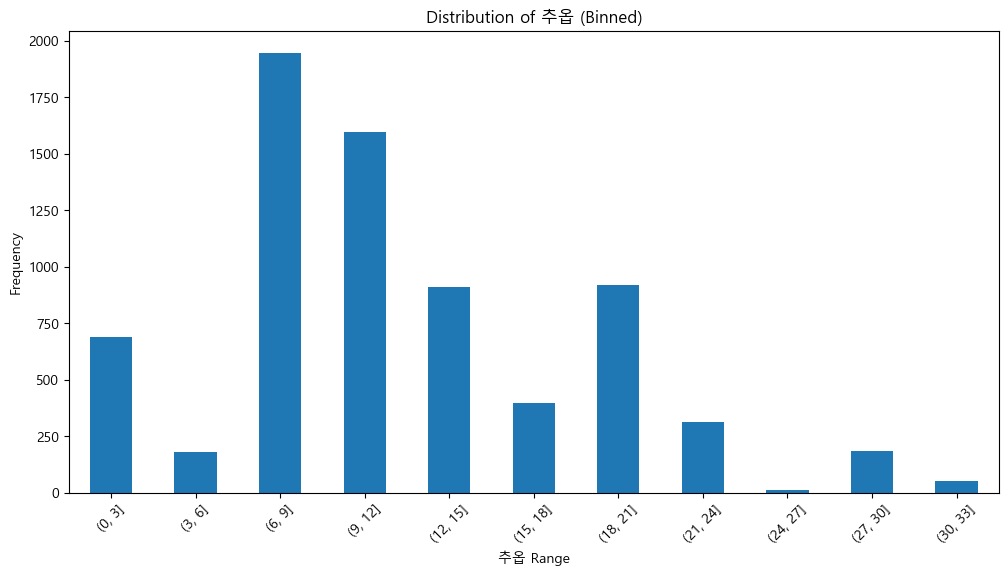

In [81]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

# Ensure negative signs are displayed correctly
plt.rcParams['axes.unicode_minus'] = False
# Define bins for '추옵' to group values into ranges
bins = range(int(dt['윗잠가치'].min()), int(dt['윗잠가치'].max()) + 3, 3)  # Adjust bin size as needed
dt['추옵_binned'] = pd.cut(dt['윗잠가치'], bins=bins)

# Plotting the binned distribution of '추옵' as a bar chart
plt.figure(figsize=(12, 6))
dt['추옵_binned'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of 추옵 (Binned)')
plt.xlabel('추옵 Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 


> 가격 대비 싼 거가 있는지.




# 크뎀과 재사용대기시간에 대한 가치 평가

> 크뎀 1줄과 2줄이 가격적으로 어느정도의 가치를 가지고 있는지 확인하고, 어느정도의 스텟 값을 가지는 지 측정한다.

In [ ]:
# 공격력의 가치는 투력이 올라갈 수록 낮아진다.
data

In [ ]:
# 가격이 상승할 수록 공격력의 가치가 떨어지는 지를 확인하고 싶어.
# 다른 스텟의 중요도가 올라간다는 거야.

## 공격력과

# 올스텟 퍼
# 부스텟
# 주스텟
# 직업
# 주스텟 퍼
# 크뎀
# 재사용

In [ ]:
dt[['star_force','추옵','윗잠가치','아랫잠가치','가위']]

In [85]:
mean_values

star_force    10.683415
추옵            86.521598
윗잠가치           8.164835
아랫잠가치          4.114830
가위             8.259128
dtype: float64

Available rows: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

Enter the row index you want to visualize: 1


TypeError: 'value' must be an instance of str or bytes, not a numpy.int64

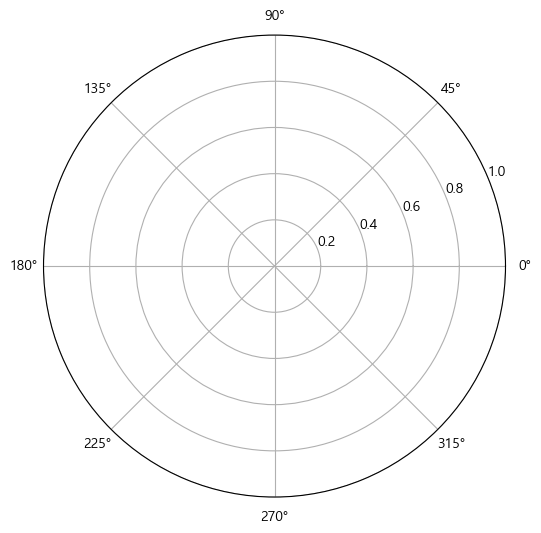

In [91]:
# 레이더 차트 생성 함수
def plot_radar_chart(row, index):
    categories = row.index
    values = row.values
    values = np.append(values, values[0])  # 5각형 닫기

    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # 닫힌 도형

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(f"Radar Chart for Row {index}")
    plt.show()

# 사용자 입력에 따라 특정 행을 시각화
def visualize_specific_row():
    print("Available rows:", dt1.index.tolist())
    try:
        row_index = int(input("Enter the row index you want to visualize: "))
        if row_index in dt1.index:
            plot_radar_chart(dt1.iloc[row_index], row_index)
        else:
            print("Invalid row index. Please enter a valid index from the available rows.")
    except ValueError:
        print("Please enter a valid integer.")

# 실행
visualize_specific_row()

In [89]:
data

[0.0,
 1.2566370614359172,
 2.5132741228718345,
 3.7699111843077517,
 5.026548245743669,
 0.0]

In [104]:
len(data[(data['price']>2000000000)&(data['star_force']>12)])

3190

In [105]:
len(data[(data['price']>3000000000)&(data['star_force']>12)])

2516

In [73]:
dts = data.copy()

In [74]:
dts = dts[dts.potential_stat >= 12].reset_index(drop=True)
dts = dts[dts.editonal_stat >= 4].reset_index(drop=True)
dts['editonal_stat'] = dts.editonal_stat.round(0)
dts['potential_stat'] = dts.potential_stat.round(0)

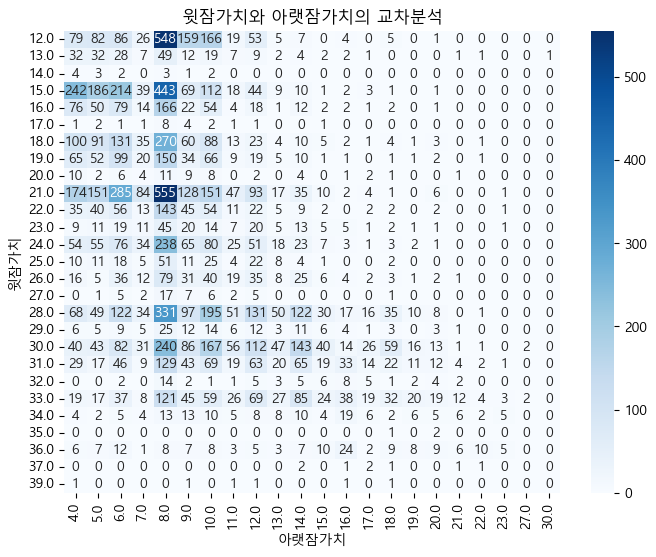

In [75]:
crosstab = pd.crosstab(dts['potential_stat'], dts['editonal_stat'])

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('윗잠가치와 아랫잠가치의 교차분석')
plt.xlabel('아랫잠가치')
plt.ylabel('윗잠가치')
plt.show()

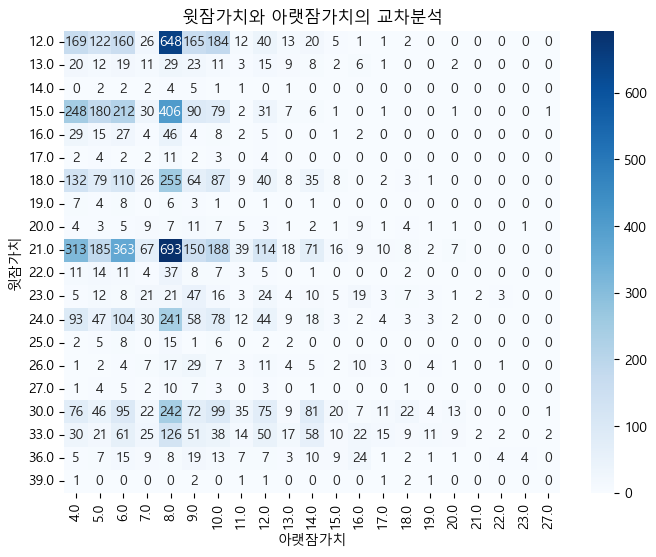

In [296]:
crosstab = pd.crosstab(dts['potential_stat'], dts['editonal_stat'])

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('윗잠가치와 아랫잠가치의 교차분석')
plt.xlabel('아랫잠가치')
plt.ylabel('윗잠가치')
plt.show()

In [307]:
dts[dts['potential_stat']<=30]

,name,link,price,date,price_numeric,date_in_minutes,unique_id,stat_data,star_force,server,duty,STR_stat_총합,STR_stat_추옵,STR_stat_yellow,DEX_stat_총합,DEX_stat_추옵,DEX_stat_강화,DEX_stat_yellow,공격력_stat_총합,공격력_stat_추옵,공격력_stat_강화,올스탯_stat_총합,올스탯_stat_추옵,업그레이드 가능 횟수_stat_white,황금망치 재련 적용_stat_white,가위 사용 가능 횟수_stat_yellow,STR_stat_강화,INT_stat_총합,INT_stat_강화,INT_stat_yellow,LUK_stat_총합,LUK_stat_강화,LUK_stat_yellow,공격력_stat_yellow,마력_stat_총합,마력_stat_강화,마력_stat_yellow,INT_stat_추옵,마력_stat_추옵,LUK_stat_추옵,착용 레벨 감소_stat_white,몬스터 방어율 무시_stat_white,업그레이드 가능 횟수_stat_yellow,Potential Type,Editional Potential Type,윗잠_1,윗잠_2,윗잠_3,아랫잠_1,아랫잠_2,아랫잠_3,직업,윗잠_1_추정치,윗잠_2_추정치,윗잠_3_추정치,윗잠가치,아랫잠_1_추정치,아랫잠_2_추정치,아랫잠_3_추정치,아랫잠가치,potential_int,potential_str,potential_dex,potential_luk,potential_hp,potetial_importance_stat,potential_stat,potential_importance_stat,editonal_int,editonal_str,editonal_dex,editonal_luk,editonal_hp,editonal_importance_stat,editonal_stat
0,아케인셰이드 아처케이프,https://www.xn--hz2b1j494a9mhnwh.com/normal/50807784?sst=once_price&sod=asc&page=8,3999999999,2025.01.16 23:15,4.000000e+09,0,50807784,"[{'장비 분류_stat_white': '장비 분류 : 망토'}, {'STR_stat_blue': 'STR : +96', 'STR_stat_white': ')', 'STR_stat_green': '+30', 'STR_stat_yellow': '+31'}, {'DEX_stat_blue': 'DEX : +231', 'DEX_stat_white': ')', 'DEX_stat_green': '+85', 'DEX_stat_purple': '+80', 'DEX_stat_yellow': '+31'}, {'INT_stat_white': 'INT : +35'}, {'LUK_stat_white': 'LUK : +35'}, {'공격력_stat_blue': '공격력 : +12', '공격력_stat_white': ')', '공격력_stat_green': '+5', '공격력_stat_purple': '+1'}, {'마력_stat_white': '마력 : +6'}, {'올스탯_stat_blue': '올스탯 : +4%', '올스탯_stat_white': ')', '올스탯_stat_green': '+4%'}, {'업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'황금망치 재련 적용_stat_white': '황금망치 재련 적용'}, {'가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 7회'}]",12.0,루나,9,96.0,30.0,31.0,231.0,85.0,80.0,31.0,12.0,5.0,1.0,4.0,4.0,0,황금망치 재련 적용,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,유니크 잠재능력,에픽 에디셔널 잠재능력,DEX : +9%,DEX : +6%,DEX : +6%,올스탯 : +2%,공격력 : +10,STR : +2%,궁수,9.0,6.0,6.0,21.0,0.0,4.0,0.20,4.20,0.0,2.1,21.0,2.1,0.0,0,21.0,DEX,2.2,8.20,6.4,6.20,4.0,STR,8.0
1,아케인셰이드 메이지숄더,https://www.xn--hz2b1j494a9mhnwh.com/normal/50692563?sst=once_price&sod=asc&sop=and&page=1,1700000000,2025.01.15 23:13,1.700000e+09,0,50692563,"[{'장비 분류_stat_white': '장비 분류 : 어깨장식'}, {'STR_stat_blue': 'STR : +67', 'STR_stat_white': ')', 'STR_stat_purple': '+2', 'STR_stat_yellow': '+30'}, {'DEX_stat_blue': 'DEX : +67', 'DEX_stat_white': ')', 'DEX_stat_purple': '+2', 'DEX_stat_yellow': '+30'}, {'INT_stat_blue': 'INT : +107', 'INT_stat_white': ')', 'INT_stat_purple': '+2', 'INT_stat_yellow': '+70'}, {'LUK_stat_blue': 'LUK : +113', 'LUK_stat_white': ')', 'LUK_stat_purple': '+8', 'LUK_stat_yellow': '+70'}, {'공격력_stat_blue': '공격력 : +49', '공격력_stat_white': ')', '공격력_stat_purple': '+4', '공격력_stat_yellow': '+25'}, {'마력_stat_blue': '마력 : +49', '마력_stat_white': ')', '마력_stat_purple': '+4', '마력_stat_yellow': '+25'}, {'업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'황금망치 재련 적용_stat_white': '황금망치 재련 적용'}]",17.0,엘리시움,3,67.0,NaN,30.0,67.0,NaN,2.0,30.0,49.0,NaN,4.0,NaN,NaN,0,황금망치 재련 적용,NaN,2.0,107.0,2.0,70.0,113.0,8.0,70.0,25.0,49.0,4.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,유니크 잠재능력,에픽 에디셔널 잠재능력,INT : +9%,INT : +6%,LUK : +6%,점프력 : +8,DEX : +10,마력 : +10,마법사,9.0,6.0,0.6,15.6,0.0,0.0,4.00,4.00,15.6,0.0,0.0,6.0,0.0,0,16.0,INT,4.0,0.10,1.0,0.10,0.0,INT,4.0
2,데이브레이크 펜던트,https://www.xn--hz2b1j494a9mhnwh.com/normal/50734328?sst=once_price&sod=asc&page=4,1397000000,2025.01.15 23:02,1.397000e+09,0,50734328,"[{'장비 분류_stat_white': '장비 분류 : 펜던트'}, {'STR_stat_blue': 'STR : +63', 'STR_stat_white': ')', 'STR_stat_green': '+24', 'STR_stat_yellow': '+31'}, {'DEX_stat_blue': 'DEX : +39', 'DEX_stat_white': ')', 'DEX_stat_yellow': '+31'}, {'INT_stat_blue': 'INT : +87', 'INT_stat_white': ')', 'INT_stat_green': '+48', 'INT_stat_yellow': '+31'}, {'LUK_stat_blue': 'LUK : +39', 'LUK_stat_white': ')', 'LUK_stat_yellow': '+31'}, {'공격력_stat_white': '공격력 : +2'}, {'마력_stat_blue': '마력 : +

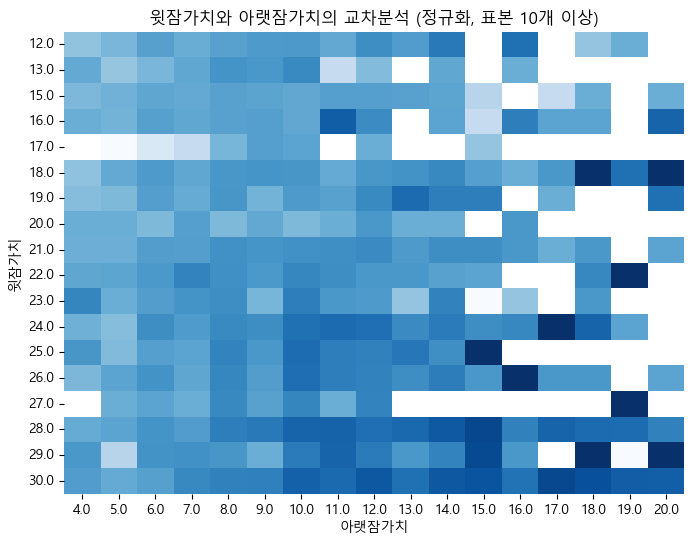

In [323]:
from sklearn.preprocessing import MinMaxScaler

# 1. 이상치 제거 (IQR 방법)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# `price`의 이상치 제거
dts_cleaned = remove_outliers(dts, 'price')

# 2. 정규화 (Min-Max 스케일링)
scaler = MinMaxScaler()
dts_cleaned['normalized_price'] = scaler.fit_transform(dts_cleaned[['price']])

# 3. 교차 표본 개수 확인
count_table = pd.pivot_table(
    dts_cleaned[dts_cleaned['potential_stat'] <= 30],
    values='star_force', 
    index='potential_stat', 
    columns='editonal_stat', 
    aggfunc='count'
)

# 표본 개수가 10개 이상인 행과 열 필터링
valid_rows = count_table.index[count_table.sum(axis=1) >= 10]
valid_cols = count_table.columns[count_table.sum(axis=0) >= 10]

# 4. Pivot table 생성 (정규화된 가격)
pivot_table = pd.pivot_table(
    dts_cleaned[dts_cleaned['potential_stat'] <= 30], 
    values='star_force', 
    index='potential_stat', 
    columns='editonal_stat', 
    aggfunc='mean'
)

# 필터링된 행과 열만 남기기
pivot_table = pivot_table.loc[valid_rows, valid_cols]

# 5. Heatmap 그리기 (내부 값 제외)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=False, cmap='Blues', cbar=False)
plt.title('윗잠가치와 아랫잠가치의 교차분석 (정규화, 표본 10개 이상)')
plt.xlabel('아랫잠가치')
plt.ylabel('윗잠가치')
plt.show()


In [334]:
dtss[dtss['editonal_importance_stat']!=dtss['potential_importance_stat']]

,name,link,price,date,price_numeric,date_in_minutes,unique_id,stat_data,star_force,server,duty,STR_stat_총합,STR_stat_추옵,STR_stat_yellow,DEX_stat_총합,DEX_stat_추옵,DEX_stat_강화,DEX_stat_yellow,공격력_stat_총합,공격력_stat_추옵,공격력_stat_강화,올스탯_stat_총합,올스탯_stat_추옵,업그레이드 가능 횟수_stat_white,황금망치 재련 적용_stat_white,가위 사용 가능 횟수_stat_yellow,STR_stat_강화,INT_stat_총합,INT_stat_강화,INT_stat_yellow,LUK_stat_총합,LUK_stat_강화,LUK_stat_yellow,공격력_stat_yellow,마력_stat_총합,마력_stat_강화,마력_stat_yellow,INT_stat_추옵,마력_stat_추옵,LUK_stat_추옵,착용 레벨 감소_stat_white,몬스터 방어율 무시_stat_white,업그레이드 가능 횟수_stat_yellow,Potential Type,Editional Potential Type,윗잠_1,윗잠_2,윗잠_3,아랫잠_1,아랫잠_2,아랫잠_3,직업,윗잠_1_추정치,윗잠_2_추정치,윗잠_3_추정치,윗잠가치,아랫잠_1_추정치,아랫잠_2_추정치,아랫잠_3_추정치,아랫잠가치,potential_int,potential_str,potential_dex,potential_luk,potential_hp,potetial_importance_stat,potential_stat,potential_importance_stat,editonal_int,editonal_str,editonal_dex,editonal_luk,editonal_hp,editonal_importance_stat,editonal_stat
27,에테르넬 메이지햇,https://www.xn--hz2b1j494a9mhnwh.com/normal/50568620?sst=once_price&sod=asc&page=6,61999999999,2025.01.15 23:14,6.200000e+10,2,50568620,"[{'장비 분류_stat_white': '장비 분류 : 모자'}, {'INT_stat_blue': 'INT : +480', 'INT_stat_white': ')', 'INT_stat_green': '+127', 'INT_stat_purple': '+114', 'INT_stat_yellow': '+159'}, {'LUK_stat_blue': 'LUK : +288', 'LUK_stat_white': ')', 'LUK_stat_green': '+49', 'LUK_stat_yellow': '+159'}, {'공격력_stat_blue': '공격력 : +120', '공격력_stat_white': ')', '공격력_stat_yellow': '+120'}, {'마력_stat_blue': '마력 : +131', '마력_stat_white': ')', '마력_stat_purple': '+1', '마력_stat_yellow': '+120'}, {'몬스터 방어율 무시_stat_white': '몬스터 방어율 무시 : +15%'}, {'올스탯_stat_blue': '올스탯 : +5%', '올스탯_stat_white': ')', '올스탯_stat_green': '+5%'}, {'업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'황금망치 재련 적용_stat_white': '황금망치 재련 적용'}, {'가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 4회'}]",22.0,엘리시움,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,5.0,5.0,0,황금망치 재련 적용,4.0,NaN,480.0,114.0,159.0,288.0,NaN,159.0,120.0,131.0,1.0,120.0,127.0,NaN,49.0,NaN,15.0,NaN,레전더리 잠재능력,레전더리 에디셔널 잠재능력,올스탯 : +10%,INT : +10%,올스탯 : +7%,올스탯 : +7%,DEX : +19,올스탯 : +6%,마법사,0.0,10.0,0.0,10.0,0.0,0.0,0.00,0.00,28.7,18.7,18.7,18.7,0.0,0,29.0,INT,14.30,14.49,16.2,14.49,0.0,DEX,16.0
45,에스텔라 이어링,https://www.xn--hz2b1j494a9mhnwh.com/normal/50820421?sst=once_price&sod=asc&page=19,14299999999,2025.01.16 23:07,1.430000e+10,7,50820421,"[{'장비 분류_stat_white': '장비 분류 : 귀고리'}, {'STR_stat_blue': 'STR : +168', 'STR_stat_white': ')', 'STR_stat_green': '+30', 'STR_stat_yellow': '+131'}, {'DEX_stat_blue': 'DEX : +163', 'DEX_stat_white': ')', 'DEX_stat_green': '+25', 'DEX_stat_yellow': '+131'}, {'INT_stat_blue': 'INT : +163', 'INT_stat_white': ')', 'INT_stat_green': '+25', 'INT_stat_yellow': '+131'}, {'LUK_stat_blue': 'LUK : +213', 'LUK_stat_white': ')', 'LUK_stat_green': '+75', 'LUK_stat_yellow': '+131'}, {'공격력_stat_blue': '공격력 : +123', '공격력_stat_white': ')', '공격력_stat_purple': '+29', '공격력_stat_yellow': '+92'}, {'마력_stat_blue': '마력 : +94', '마력_stat_white': ')', '마력_stat_yellow': '+92'}, {'올스탯_stat_blue': '올스탯 : +6%', '올스탯_stat_white': ')', '올스탯_stat_green': '+6%'}, {'업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'황금망치 재련 적용_stat_white': '황금망치 재련 적용'}, {'가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 5회'}]",22.0,엘리시움,32,168.0,30.0,131.0,163.0,25.0,NaN,131.0,123.0,NaN,29.0,6.0,6.0,0,황금망치 재련 적용,5.0,NaN,163.0,NaN,131.0,213.0,NaN,131.0,92.0,94.0,NaN,92.0,25.0,NaN,75.0,NaN,NaN,NaN,레전더리 잠재능력,유니크 에디셔널 잠재능력,LUK : +12%,LUK : +9%,올스탯 : +6%,공격력 : +14,최대 HP : +5%,LUK : +4%,공용,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,8.7,6.6,6.6,27.6,0.0,0,28.0,LUK,0.40,5.60,5.6,9.60,10.6,HP,11.0
63,커맨더 포스 이어링,https://www.xn--hz2b1j494a9mhnwh.com/normal/50706819?sst=once_price&sod=asc&page=10,11000000000,2025.01.15 23:07,1.100000e+10,10,50706819,"[{'장비 분류_stat_white': '장비 분류 : 귀고리'}, {'STR_stat_blue': 'STR : +134', 'STR_stat_white': ')', 'STR_stat_green': '+30', 'STR_stat_purple': '+12', 'STR_stat_yellow': '+85'}, {'DEX_stat_blue': 'DEX : +92', 'DEX_stat_white': ')', 'DEX_stat_yellow': '+85'}, {'INT_stat_blue': '

In [331]:
len(dts[dts['editonal_importance_stat']==dts['potential_importance_stat']])

2752

In [360]:
dts[(dts['editonal_importance_stat']==dts['potential_importance_stat'])&(dts['star_force']==18)&(dts['직업'].str.contains('공용'))].groupby('potential_importance_stat').mean('price')

,price,price_numeric,date_in_minutes,unique_id,star_force,duty,STR_stat_총합,STR_stat_추옵,STR_stat_yellow,DEX_stat_총합,DEX_stat_추옵,DEX_stat_강화,DEX_stat_yellow,공격력_stat_총합,공격력_stat_추옵,공격력_stat_강화,올스탯_stat_총합,올스탯_stat_추옵,업그레이드 가능 횟수_stat_white,가위 사용 가능 횟수_stat_yellow,STR_stat_강화,INT_stat_총합,INT_stat_강화,INT_stat_yellow,LUK_stat_총합,LUK_stat_강화,LUK_stat_yellow,공격력_stat_yellow,마력_stat_총합,마력_stat_강화,마력_stat_yellow,INT_stat_추옵,마력_stat_추옵,LUK_stat_추옵,착용 레벨 감소_stat_white,몬스터 방어율 무시_stat_white,업그레이드 가능 횟수_stat_yellow,윗잠_1_추정치,윗잠_2_추정치,윗잠_3_추정치,윗잠가치,아랫잠_1_추정치,아랫잠_2_추정치,아랫잠_3_추정치,아랫잠가치,potential_int,potential_str,potential_dex,potential_luk,potential_hp,potetial_importance_stat,potential_stat,editonal_int,editonal_str,editonal_dex,editonal_luk,editonal_hp,editonal_stat
potential_importance_stat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DEX,1.062658e+10,1.062658e+10,983.419753,5.081685e+07,18.0,23.975309,98.851852,27.466667,76.185185,138.160494,63.774194,4.930233,76.185185,52.197531,5.055556,16.657534,5.293103,5.293103,0.185185,5.395062,4.051282,98.765432,4.325000,76.185185,103.641975,4.135135,76.185185,32.111111,39.222222,5.279070,32.111111,33.416667,4.833333,30.425000,22.5,NaN,1.400000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,3.844444,6.218519,26.618519,6.255556,0.333333,0.0,26.654321,1.062963,5.068765,9.231605,4.937901,3.429630,9.172840
HP,6.818234e+09,6.818234e+09,995.280000,5.085276e+07,18.0,15.320000,96.160000,36.500000,74.200000,95.720000,34.500000,4.909091,74.200000,50.280000,5.444444,16.500000,5.750000,5.750000,0.000000,6.680000,4.083333,98.560000,6.454545,74.200000,94.720000,3.727273,74.200000,30.840000,36.560000,4.230769,30.840000,36.666667,4.666667,33.000000,22.5,NaN,2.200000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.024000,0.024000,0.240000,0.264000,25.320000,0.0,25.320000,0.493600,3.335200,3.400000,3.391200,8.936000,8.920000
INT,7.032685e+09,7.032685e+09,998.027491,5.086035e+07,18.0,15.666667,96.893471,31.009346,74.381443,94.353952,28.138298,5.198758,74.381443,38.178694,4.950000,6.262821,5.343284,5.343284,0.061856,6.103806,5.533742,128.993127,5.593220,74.381443,95.817869,5.216049,74.381443,31.020619,48.780069,15.156863,31.020619,61.926108,5.000000,28.351852,25.0,NaN,2.354839,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,24.157732,3.981443,3.888660,3.888660,0.298969,0.0,24.233677,8.531375,1.070687,1.041478,1.083746,0.353952,8.457045
LUK,9.088488e+09,9.088488e+09,1020.776316,5.081550e+07,18.0,20.407895,100.500000,30.218750,75.463576,101.078947,31.630769,5.243902,75.463576,52.171053,5.125000,17.414286,5.398230,5.398230,0.032895,5.553333,5.523810,99.460526,5.518072,75.463576,138.868421,5.454545,75.463576,31.728477,38.401316,5.116279,31.728477,29.733333,5.000000,68.592920,25.0,NaN,1.600000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,5.968421,3.777632,3.973026,25.310526,0.078947,0.0,25.375000,2.071645,4.172763,4.316776,9.128026,2.909211,9.098684
STR,9.289618e+09,9.289618e+09,1037.221311,5.087191e+07,18.0,20.852459,136.631148,68.505747,75.459016,99.827869,30.875000,4.520000,75.459016,52.680328,5.000000,17.333333,5.294118,5.294118,0.114754,6.148760,4.493671,98.245902,4.217949,75.459016,101.475410,4.357143,75.459016,31.622951,38.598361,4.459459,31.622951,27.617021,4.714286,31.777778,25.0,NaN,2.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,3.956557,23.606557,6.012295,4.032787,0.344262,0.0,23.696721,1.351393,8.710738,6.116311,5.722213,4.693443,8.614754


In [347]:
dtss[dtss['editonal_importance_stat']!=dtss['potential_importance_stat']][['직업','윗잠_1','윗잠_2','윗잠_3','아랫잠_1','아랫잠_2','아랫잠_3','potential_importance_stat','editonal_importance_stat','potential_stat','editonal_stat']]

,직업,윗잠_1,윗잠_2,윗잠_3,아랫잠_1,아랫잠_2,아랫잠_3,potential_importance_stat,editonal_importance_stat,potential_stat,editonal_stat
27,마법사,올스탯 : +10%,INT : +10%,올스탯 : +7%,올스탯 : +7%,DEX : +19,올스탯 : +6%,INT,DEX,29.0,16.0
45,공용,LUK : +12%,LUK : +9%,올스탯 : +6%,공격력 : +14,최대 HP : +5%,LUK : +4%,LUK,HP,28.0,11.0
63,공용,최대 HP : +12%,최대 HP : +12%,최대 HP : +9%,공격력 : +11,INT : +14,INT : +4%,HP,INT,33.0,5.0
65,궁수,DEX : +10%,DEX : +7%,DEX : +7%,공격력 : +12,방어력 : +3%,공격력 : +11,DEX,STR,24.0,9.0
72,전사,최대 HP : +12%,최대 HP : +12%,최대 HP : +9%,공격력 : +10,방어력 : +60,DEX : +6,HP,DEX,33.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
10456,도적,LUK : +12%,LUK : +9%,LUK : +9%,공격력 : +11,INT : +2%,공격력 : +10,LUK,STR,30.0,8.0
10460,전사,올스탯 : +9%,올스탯 : +6%,올스탯 : +6%,LUK : +14,STR : +4%,STR : +4%,INT,STR,23.0,8.0
10468,해적,올스탯 : +9%,STR : +12%,STR : +9%,공격력 : +11,공격력 : +10,DEX : +2%,STR,DEX,31.0,10.0
10476,해적,DEX : +12%,DEX : +12%,올스탯 : +6%,올스탯 : +2%,공격력 : +10,공격력 : +10,DEX,STR,31.0,10.0


In [375]:
dtss

,name,link,price,date,price_numeric,date_in_minutes,unique_id,stat_data,star_force,server,duty,STR_stat_총합,STR_stat_추옵,STR_stat_yellow,DEX_stat_총합,DEX_stat_추옵,DEX_stat_강화,DEX_stat_yellow,공격력_stat_총합,공격력_stat_추옵,공격력_stat_강화,올스탯_stat_총합,올스탯_stat_추옵,업그레이드 가능 횟수_stat_white,황금망치 재련 적용_stat_white,가위 사용 가능 횟수_stat_yellow,STR_stat_강화,INT_stat_총합,INT_stat_강화,INT_stat_yellow,LUK_stat_총합,LUK_stat_강화,LUK_stat_yellow,공격력_stat_yellow,마력_stat_총합,마력_stat_강화,마력_stat_yellow,INT_stat_추옵,마력_stat_추옵,LUK_stat_추옵,착용 레벨 감소_stat_white,몬스터 방어율 무시_stat_white,업그레이드 가능 횟수_stat_yellow,Potential Type,Editional Potential Type,윗잠_1,윗잠_2,윗잠_3,아랫잠_1,아랫잠_2,아랫잠_3,직업,윗잠_1_추정치,윗잠_2_추정치,윗잠_3_추정치,윗잠가치,아랫잠_1_추정치,아랫잠_2_추정치,아랫잠_3_추정치,아랫잠가치,potential_int,potential_str,potential_dex,potential_luk,potential_hp,potetial_importance_stat,potential_stat,potential_importance_stat,editonal_int,editonal_str,editonal_dex,editonal_luk,editonal_hp,editonal_importance_stat,editonal_stat
25,하이네스 워리어헬름,https://www.xn--hz2b1j494a9mhnwh.com/normal/50817484?sst=once_price&sod=asc&page=16,11999999999,2025.01.16 23:09,1.200000e+10,2,50817484,"[{'장비 분류_stat_white': '장비 분류 : 모자'}, {'STR_stat_blue': 'STR : +254', 'STR_stat_white': ')', 'STR_stat_green': '+64', 'STR_stat_purple': '+77', 'STR_stat_yellow': '+73'}, {'DEX_stat_blue': 'DEX : +161', 'DEX_stat_white': ')', 'DEX_stat_green': '+48', 'DEX_stat_yellow': '+73'}, {'INT_stat_blue': 'INT : +16', 'INT_stat_white': ')', 'INT_stat_green': '+16'}, {'공격력_stat_blue': '공격력 : +33', '공격력_stat_white': ')', '공격력_stat_purple': '+1', '공격력_stat_yellow': '+30'}, {'마력_stat_blue': '마력 : +30', '마력_stat_white': ')', '마력_stat_yellow': '+30'}, {'몬스터 방어율 무시_stat_white': '몬스터 방어율 무시 : +10%'}, {'올스탯_stat_blue': '올스탯 : +6%', '올스탯_stat_white': ')', '올스탯_stat_green': '+6%'}, {'업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 8회'}]",18.0,크로아,27,254.0,64.0,73.0,161.0,48.0,NaN,73.0,33.0,NaN,1.0,6.0,6.0,0,None,8.0,77.0,16.0,NaN,NaN,NaN,NaN,NaN,30.0,30.0,NaN,30.0,16.0,NaN,NaN,NaN,10.0,NaN,레전더리 잠재능력,유니크 에디셔널 잠재능력,STR : +12%,"모든 스킬의 재사용 대기시간 : -2초(10초 이하는 10%감소, 5초 미만으로 감소 불가)",STR : +9%,올스탯 : +5%,공격력 : +11,INT : +14,전사,12.0,0.0,9.0,21.0,0.00,4.40,0.00,4.40,0.0,21.0,2.1,0.0,0.0,0,21.0,STR,6.90,9.90,9.90,9.90,4.4,STR,10.0
27,에테르넬 메이지햇,https://www.xn--hz2b1j494a9mhnwh.com/normal/50568620?sst=once_price&sod=asc&page=6,61999999999,2025.01.15 23:14,6.200000e+10,2,50568620,"[{'장비 분류_stat_white': '장비 분류 : 모자'}, {'INT_stat_blue': 'INT : +480', 'INT_stat_white': ')', 'INT_stat_green': '+127', 'INT_stat_purple': '+114', 'INT_stat_yellow': '+159'}, {'LUK_stat_blue': 'LUK : +288', 'LUK_stat_white': ')', 'LUK_stat_green': '+49', 'LUK_stat_yellow': '+159'}, {'공격력_stat_blue': '공격력 : +120', '공격력_stat_white': ')', '공격력_stat_yellow': '+120'}, {'마력_stat_blue': '마력 : +131', '마력_stat_white': ')', '마력_stat_purple': '+1', '마력_stat_yellow': '+120'}, {'몬스터 방어율 무시_stat_white': '몬스터 방어율 무시 : +15%'}, {'올스탯_stat_blue': '올스탯 : +5%', '올스탯_stat_white': ')', '올스탯_stat_green': '+5%'}, {'업그레이드 가능 횟수_stat_white': '업그레이드 가능 횟수 : 0'}, {'황금망치 재련 적용_stat_white': '황금망치 재련 적용'}, {'가위 사용 가능 횟수_stat_yellow': '가위 사용 가능 횟수 : 4회'}]",22.0,엘리시움,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,5.0,5.0,0,황금망치 재련 적용,4.0,NaN,480.0,114.0,159.0,288.0,NaN,159.0,120.0,131.0,1.0,120.0,127.0,NaN,49.0,NaN,15.0,NaN,레전더리 잠재능력,레전더리 에디셔널 잠재능력,올스탯 : +10%,INT : +10%,올스탯 : +7%,올스탯 : +7%,DEX : +19,올스탯 : +6%,마법사,0.0,10.0,0.0,10.0,0.00,0.00,0.00,0.00,28.7,18.7,18.7,18.7,0.0,0,29.0,INT,14.30,14.49,16.20,14.49,0.0,DEX,16.0
29,에테르넬 나이트헬름,https://www.xn--hz2b1j494a9mhnwh.com/normal/50806099?sst=once_price&sod=asc&page=3,102000000000,2025.01.16 23:16,1.020000e+11,3,50806099,"[{'장비 분류_stat_white': '장비 분류 : 모자'}, {'STR_stat_blue': 'STR : +389', 'STR_stat_white': ')', 'STR_stat_green': '+141', 'STR_stat_purple': '+9', 'STR_stat_yellow': '+159'}, {'DEX_stat_blue': 'DEX : +253', 'DEX_stat_white': ')', 'DEX_stat_purple': '+14', 'DEX_stat_yellow': '+159'}, {'INT_stat_blue': 'INT : +165', 'INT_stat_white': ')', 'INT_stat

In [376]:
[['name','price','date','unique_id','star_force','server','duty','업그레이드 가능 횟수_stat_white',,'가위 사용 가능 횟수_stat_yellow','Potential Type','Editional Potential Type','윗잠_1','윗잠_2','윗잠_3','아랫잠_1','아랫잠_2','아랫잠_3','potential_stat',,'potential_importance_stat','editonal_stat','editonal_importance_stat']]

SyntaxError: invalid syntax (785563132.py, line 1)

In [382]:
dtss[['name', 'price', 'date', 'unique_id', 'star_force', 'server', 'duty', 
 '업그레이드 가능 횟수_stat_white', '가위 사용 가능 횟수_stat_yellow', 
 'Potential Type', 'Editional Potential Type', 
 '윗잠_1', '윗잠_2', '윗잠_3', 
 '아랫잠_1', '아랫잠_2', '아랫잠_3', 
 'potential_stat', 'potential_importance_stat', 
 'editonal_stat', 'editonal_importance_stat']]

,name,price,date,unique_id,star_force,server,duty,업그레이드 가능 횟수_stat_white,가위 사용 가능 횟수_stat_yellow,Potential Type,Editional Potential Type,윗잠_1,윗잠_2,윗잠_3,아랫잠_1,아랫잠_2,아랫잠_3,potential_stat,potential_importance_stat,editonal_stat,editonal_importance_stat
25,하이네스 워리어헬름,11999999999,2025.01.16 23:09,50817484,18.0,크로아,27,0,8.0,레전더리 잠재능력,유니크 에디셔널 잠재능력,STR : +12%,"모든 스킬의 재사용 대기시간 : -2초(10초 이하는 10%감소, 5초 미만으로 감소 불가)",STR : +9%,올스탯 : +5%,공격력 : +11,INT : +14,21.0,STR,10.0,STR
27,에테르넬 메이지햇,61999999999,2025.01.15 23:14,50568620,22.0,엘리시움,142,0,4.0,레전더리 잠재능력,레전더리 에디셔널 잠재능력,올스탯 : +10%,INT : +10%,올스탯 : +7%,올스탯 : +7%,DEX : +19,올스탯 : +6%,29.0,INT,16.0,DEX
29,에테르넬 나이트헬름,102000000000,2025.01.16 23:16,50806099,22.0,베라,234,0,9.0,레전더리 잠재능력,레전더리 에디셔널 잠재능력,STR : +13%,STR : +13%,STR : +10%,STR : +9%,올스탯 : +6%,공격력 : +15,36.0,STR,22.0,STR
32,에테르넬 나이트숄더,18555555555,2025.01.15 23:15,50553152,15.0,루나,42,0,NaN,레전더리 잠재능력,레전더리 에디셔널 잠재능력,올스탯 : +10%,STR : +10%,STR : +10%,올스탯 : +7%,캐릭터 기준 9레벨 당 STR : +1,STR : +7%,31.0,STR,18.0,STR
35,루즈 컨트롤 머신 마크,44999999999,2025.01.15 22:52,50738183,22.0,루나,103,0,5.0,레전더리 잠재능력,레전더리 에디셔널 잠재능력,DEX : +12%,DEX : +12%,DEX : +9%,DEX : +8%,STR : +6%,올스탯 : +5%,33.0,DEX,14.0,DEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10500,앱솔랩스 파이렛케이프,18999999999,2025.01.17 00:32,50811718,22.0,루나,43,0,1.0,레전더리 잠재능력,레전더리 에디셔널 잠재능력,DEX : +12%,DEX : +12%,올스탯 : +6%,캐릭터 기준 9레벨 당 DEX : +2,캐릭터 기준 9레벨 당 DEX : +1,캐릭터 기준 9레벨 당 DEX : +1,31.0,DEX,12.0,DEX
10501,트릭스터 원더러팬츠,12999990000,2025.01.17 00:44,50816745,22.0,엘리시움,29,0,3.0,레전더리 잠재능력,유니크 에디셔널 잠재능력,STR : +12%,올스탯 : +6%,STR : +9%,DEX : +18,공격력 : +11,STR : +4%,28.0,STR,9.0,STR
10503,트릭스터 원더러팬츠,14999999999,2025.01.17 00:44,50816749,22.0,제니스,34,0,6.0,레전더리 잠재능력,레전더리 에디셔널 잠재능력,DEX : +12%,올스탯 : +6%,올스탯 : +6%,공격력 : +16,공격력 : +14,캐릭터 기준 9레벨 당 DEX : +1,25.0,DEX,15.0,DEX
10505,아케인셰이드 시프케이프,73333333333,2025.01.17 00:57,50814250,22.0,크로아,168,0,5.0,레전더리 잠재능력,레전더리 에디셔널 잠재능력,LUK : +12%,LUK : +9%,LUK : +12%,LUK : +8%,LUK : +18,LUK : +6%,33.0,LUK,16.0,LUK


In [380]:
data.

C:\Users\eheh5\AppData\Local\Temp\ipykernel_191928\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,price,price_numeric,date_in_minutes,unique_id,star_force,duty,STR_stat_총합,STR_stat_추옵,STR_stat_yellow,DEX_stat_총합,DEX_stat_추옵,DEX_stat_강화,DEX_stat_yellow,공격력_stat_총합,공격력_stat_추옵,공격력_stat_강화,올스탯_stat_총합,올스탯_stat_추옵,업그레이드 가능 횟수_stat_white,가위 사용 가능 횟수_stat_yellow,STR_stat_강화,INT_stat_총합,INT_stat_강화,INT_stat_yellow,LUK_stat_총합,LUK_stat_강화,LUK_stat_yellow,공격력_stat_yellow,마력_stat_총합,마력_stat_강화,마력_stat_yellow,INT_stat_추옵,마력_stat_추옵,LUK_stat_추옵,착용 레벨 감소_stat_white,몬스터 방어율 무시_stat_white,업그레이드 가능 횟수_stat_yellow,윗잠_1_추정치,윗잠_2_추정치,윗잠_3_추정치,윗잠가치,아랫잠_1_추정치,아랫잠_2_추정치,아랫잠_3_추정치,아랫잠가치,potential_int,potential_str,potential_dex,potential_luk,potential_hp,potetial_importance_stat,potential_stat,editonal_int,editonal_str,editonal_dex,editonal_luk,editonal_hp,editonal_stat
price,1.000000,1.000000,0.053898,-0.117503,0.443646,0.999982,0.276260,0.141051,0.570534,0.357512,0.157592,-0.076544,0.601979,0.651616,0.002576,0.238407,0.034142,0.034142,0.016663,-0.109273,-0.081918,0.257945,-0.064336,0.546268,0.305584,-0.074187,0.570268,0.648594,0.645626,0.107501,0.650690,0.166826,0.002396,0.167014,-0.009474,0.169822,0.171153,0.053275,0.171134,0.199006,0.177003,0.102970,0.113261,0.123428,0.165641,0.089859,0.109560,0.097841,0.099638,-0.040843,NaN,0.300789,0.259143,0.198778,0.181977,0.178848,-0.142297,0.412058
price_numeric,1.000000,1.000000,0.053898,-0.117503,0.443646,0.999982,0.276260,0.141051,0.570534,0.357512,0.157592,-0.076544,0.601979,0.651616,0.002576,0.238407,0.034142,0.034142,0.016663,-0.109273,-0.081918,0.257945,-0.064336,0.546268,0.305584,-0.074187,0.570268,0.648594,0.645626,0.107501,0.650690,0.166826,0.002396,0.167014,-0.009474,0.169822,0.171153,0.053275,0.171134,0.199006,0.177003,0.102970,0.113261,0.123428,0.165641,0.089859,0.109560,0.097841,0.099638,-0.040843,NaN,0.300789,0.259143,0.198778,0.181977,0.178848,-0.142297,0.412058
date_in_minutes,0.053898,0.053898,1.000000,0.137469,0.064335,0.053895,-0.002622,0.017144,0.050773,0.000847,-0.026510,-0.083180,0.067432,0.069168,0.015143,0.029424,-0.023497,-0.023497,-0.002504,-0.097021,-0.086372,0.018133,-0.050445,0.055105,0.042687,-0.046649,0.065137,0.065635,0.075376,-0.003846,0.066802,0.018078,-0.076978,0.031527,0.063534,0.029071,0.020640,0.008560,0.029194,0.033917,0.002914,-0.030487,-0.006768,0.007900,-0.030577,0.027854,0.024043,0.013690,0.059407,-0.001370,NaN,0.064611,0.009925,-0.018453,-0.033500,-0.007547,-0.073116,0.000509
unique_id,-0.117503,-0.117503,0.137469,1.000000,0.022333,-0.117491,-0.039100,-0.035141,-0.035647,-0.042355,-0.024262,-0.029537,-0.027796,-0.019631,0.039347,0.056035,0.017276,0.017276,0.011095,0.080020,-0.011251,-0.086224,-0.089010,-0.044476,-0.034202,-0.010460,-0.029990,-0.049284,-0.045658,0.035525,-0.050860,-0.080517,0.011365,-0.003983,0.037771,-0.039454,-0.012546,-0.025925,-0.062881,-0.042602,-0.080068,-0.047928,-0.010981,-0.004993,-0.067496,-0.070052,-0.002201,-0.031680,-0.006736,0.009295,NaN,-0.087248,-0.043572,0.018219,0.013204,0.022713,0.036194,-0.018021
star_force,0.443646,0.443646,0.064335,0.022333,1.000000,0.443662,0.267382,-0.057160,0.855139,0.363906,-0.011765,-0.031542,0.895036,0.838284,0.003816,0.094112,0.066507,0.066507,-0.021897,-0.250747,-0.038495,0.254652,-0.006792,0.821302,0.331598,0.002393,0.855817,0.956588,0.868113,-0.018261,0.963640,-0.030923,-0.015024,0.021024,-0.008080,-0.022802,-0.019211,0.033391,0.122955,0.127090,0.073538,0.075149,0.157767,0.184271,0.124167,0.063707,0.068036,0.078393,0.125106,-0.053447,NaN,0.219923,0.156705,0.141513,0.127941,0.165187,-0.052133,0.314284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
editonal_str,0.198778,0.198778,-0.018453,0.018219,0.141513,0.198794,0.414918,0.411151,0.242534,0.241568,0.068738,0.066346,0.217187,0.216070,0.104214,0.085575,0.068077,0.068077,-0.011791,-0.001414,0.336545,-0.308559,-0.323333,0.007705,-0.024887,0.053626,0.032409,0.15

In [80]:
data_18 = data[data['star_force']==18].copy()

In [86]:
data_18.groupby(['name','potential_importance_stat']).mean('price')

price  price_numeric  \
name          potential_importance_stat                                
가디언 엔젤 링      DEX                        4.296296e+09   4.296296e+09   
              HP                         6.888889e+09   6.888889e+09   
              INT                        6.704937e+09   6.704937e+09   
              LUK                        5.564936e+09   5.564936e+09   
              STR                        2.714815e+09   2.714815e+09   
거대한 공포        DEX                        1.813013e+10   1.813013e+10   
              HP                         1.684444e+10   1.684444e+10   
              INT                        1.611417e+10   1.611417e+10   
              LUK                        1.817669e+10   1.817669e+10   
              STR                        1.847285e+10   1.847285e+10   
고통의 근원        DEX                        1.642706e+10   1.642706e+10   
              HP                         1.550000e+10   1.550000e+10   
              INT                        1.468281e+10   1.468281e+10   
              LUK                        1.779939e+10   1.779939e+10   
              STR                        1.692130e+10   1.692130e+10   
데이브레이크 펜던트    DEX                        5.915015e+09   5.915015e+09   
              HP                         5.452414e+09   5.452414e+09   
              INT                        5.527739e+09   5.527739e+09   
              LUK                        6.349052e+09   6.349052e+09   
              STR                        4.883289e+09   4.883289e+09   
루즈 컨트롤 머신 마크  DEX                        1.029425e+10   1.029425e+10   
              HP                         9.746032e+09   9.746032e+09   
              INT                        8.649762e+09   8.649762e+09   
              LUK                        8.981738e+09   8.981738e+09   
              STR                        1.159691e+10   1.159691e+10   
마력이 깃든 안대     DEX                        1.346456e+10   1.346456e+10   
              HP                         1.199000e+10   1.199000e+10   
              INT                        9.085126e+09   9.085126e+09   
              LUK                        1.233882e+10   1.233882e+10   
              STR                        1.434223e+10   1.434223e+10   
몽환의 벨트        DEX                        1.668368e+10   1.668368e+10   
              HP                         1.463778e+10   1.463778e+10   
              INT                        1.680316e+10   1.680316e+10   
              LUK                        1.825656e+10   1.825656e+10   
              STR                        2.366167e+10   2.366167e+10   
아케인셰이드 나이트글러브 DEX                        1.343333e+10   1.343333e+10   
              HP                         9.400000e+09   9.400000e+09   
              INT                        1.375633e+10   1.375633e+10   
              LUK                        1.147778e+10   1.147778e+10   
              STR                        9.287843e+09   9.287843e+09   
아케인셰이드 나이트숄더  DEX                        8.333333e+09   8.333333e+09   
              HP                         7.347937e+09   7.347937e+09   
              INT                        3.490000e+09   3.490000e+09   
              STR                        8.046988e+09   8.046988e+09   
아케인셰이드 나이트슈즈  HP                         6.820000e+09   6.820000e+09   
              STR                        8.126305e+09   8.126305e+09   
아케인셰이드 나이트케이프 HP                         7.004444e+09   7.004444e+09   
              INT                        7.500000e+09   7.500000e+09   
              LUK                        5.500000e+09   5.500000e+09   
              STR                        7.458891e+09   7.458891e+09   
아케인셰이드 메이지글러브 DEX                        1.118889e+10   1.118889e+10   
              HP                         5.555556e+09   5.555556e+09   
              INT                        9.130864e+09   9.130864e+09   
              STR                        1.279630e+10   1.279630e+10   
아케인셰이드 메이지숄더  IN